In [4]:
from PESSL2 import PESSL
import functions
import os
import numpy as np
import copy

def cos_vec(x1, x2):
    X = x1.reshape([-1])
    Y = x2.reshape([-1])
    
    return np.abs(np.dot(X, Y)) / (np.sqrt(np.dot(X, X)) * np.sqrt(np.dot(Y, Y)))

def cos_mat(X, Y):
    from numpy.linalg import norm
    from numpy.linalg import svd
    
    res1 = norm(np.matmul(X, Y.T), ord = 'fro')
    
    _, res2, _ = svd(X)
    
    _, res3, _ = svd(Y)
    
    res4 = np.sqrt(np.dot(np.square(res2), np.square(res3)))
    
    return res1 / res4

In [28]:
runs = 40
init_N = 10
num_Iter = 100
D = 25

mes = (lambda x, y : cos_vec(x, y))

for i in xrange(runs):
    fun = functions.brainin(D)
    R = PESSL(fun, 2, init_N, 100)
    R_random = PESSL(fun, 2, init_N, 100)
    R_random.data = copy.deepcopy(R.data)
    R_random.fitted_params = copy.deepcopy(R.fitted_params)
    R_random.xlist = copy.deepcopy(R.xlist)
    
    score = []
    
    for j in xrange(num_Iter - init_N):
        #vtrue = fun.W
        vtrue = np.zeros([2, D])
        
        for n in xrange(2):
            vtrue[n, fun.eff_indices[n]] = 1.
            
        v1 = R.fitted_params['mu']
        v2 = R_random.fitted_params['mu']
        
        print 'RUN : ' + str(i + 1) + ' ' + 'ITER : ' + str(j + 1) + ' PESSL : ' + str(cos_mat(vtrue, v1)) + ' RANDOM : ' + str(cos_mat(vtrue, v2))
        
        R.iterate(100)
        R_random.iterate_random()
        
        score.append([cos_mat(vtrue, v1) ,cos_mat(vtrue, v2)])
    
    R.session.close()
    R_random.session.close()
    
    result = {'W' : vtrue,
              'X' : R.data['X'],
              'Y' : R.data['y'],
              'XR' : R_random.data['X'],
              'YR' : R_random.data['y'],
              'S' : np.array(score)}
    
    file_path = "./result_PESSL/brainin10D_" + str(i)
    
    directory = os.path.dirname(file_path)

    if not os.path.exists(directory):
        os.makedirs(directory)

    np.save(file_path, result)

RUN : 1 ITER : 1 PESSL : 0.405380544189 RANDOM : 0.405380544189
RUN : 1 ITER : 2 PESSL : 0.390968472238 RANDOM : 0.241785399065
RUN : 1 ITER : 3 PESSL : 0.449513471161 RANDOM : 0.370102561974
RUN : 1 ITER : 4 PESSL : 0.406989090261 RANDOM : 0.444902656192
RUN : 1 ITER : 5 PESSL : 0.422188050235 RANDOM : 0.418095731716
RUN : 1 ITER : 6 PESSL : 0.352460701505 RANDOM : 0.455045225374
RUN : 1 ITER : 7 PESSL : 0.267163400758 RANDOM : 0.407287914923
RUN : 1 ITER : 8 PESSL : 0.367524974556 RANDOM : 0.374619721021
RUN : 1 ITER : 9 PESSL : 0.416204293273 RANDOM : 0.497804972667
RUN : 1 ITER : 10 PESSL : 0.404931366653 RANDOM : 0.367156628122
RUN : 1 ITER : 11 PESSL : 0.426244085106 RANDOM : 0.450578161475
RUN : 1 ITER : 12 PESSL : 0.438223960588 RANDOM : 0.4092342804
RUN : 1 ITER : 13 PESSL : 0.430657200696 RANDOM : 0.465403602101
RUN : 1 ITER : 14 PESSL : 0.414949742738 RANDOM : 0.301456819308
RUN : 1 ITER : 15 PESSL : 0.452472147034 RANDOM : 0.619226636732
RUN : 1 ITER : 16 PESSL : 0.42115069

RUN : 2 ITER : 38 PESSL : 0.162092030647 RANDOM : 0.54366197523
RUN : 2 ITER : 39 PESSL : 0.185081963215 RANDOM : 0.633886912361
RUN : 2 ITER : 40 PESSL : 0.23806284425 RANDOM : 0.627268451494
RUN : 2 ITER : 41 PESSL : 0.316699302615 RANDOM : 0.575125447749
RUN : 2 ITER : 42 PESSL : 0.387553719204 RANDOM : 0.61301076635
RUN : 2 ITER : 43 PESSL : 0.152114050652 RANDOM : 0.603640595671
RUN : 2 ITER : 44 PESSL : 0.504043047255 RANDOM : 0.641849754892
RUN : 2 ITER : 45 PESSL : 0.461513414617 RANDOM : 0.70580018538
RUN : 2 ITER : 46 PESSL : 0.50256407142 RANDOM : 0.728763983668
RUN : 2 ITER : 47 PESSL : 0.555918478784 RANDOM : 0.652067356148
RUN : 2 ITER : 48 PESSL : 0.505528306986 RANDOM : 0.728833017786
RUN : 2 ITER : 49 PESSL : 0.575872430905 RANDOM : 0.733497924056
RUN : 2 ITER : 50 PESSL : 0.500070659816 RANDOM : 0.641788211016
RUN : 2 ITER : 51 PESSL : 0.616944333308 RANDOM : 0.773550608923
RUN : 2 ITER : 52 PESSL : 0.545870069644 RANDOM : 0.694504340265
RUN : 2 ITER : 53 PESSL : 0.65

RUN : 3 ITER : 73 PESSL : 0.46311368401 RANDOM : 0.730026597757
RUN : 3 ITER : 74 PESSL : 0.461909919225 RANDOM : 0.63510279636
RUN : 3 ITER : 75 PESSL : 0.486209211502 RANDOM : 0.788915518433
RUN : 3 ITER : 76 PESSL : 0.45589049352 RANDOM : 0.785402414184
RUN : 3 ITER : 77 PESSL : 0.393338845372 RANDOM : 0.696355491262
RUN : 3 ITER : 78 PESSL : 0.460596497008 RANDOM : 0.689740608049
RUN : 3 ITER : 79 PESSL : 0.501579695659 RANDOM : 0.793279488847
RUN : 3 ITER : 80 PESSL : 0.498190342601 RANDOM : 0.738168167421
RUN : 3 ITER : 81 PESSL : 0.444020232636 RANDOM : 0.694196315713
RUN : 3 ITER : 82 PESSL : 0.246173813064 RANDOM : 0.73641647361
RUN : 3 ITER : 83 PESSL : 0.564211026227 RANDOM : 0.731113915441
RUN : 3 ITER : 84 PESSL : 0.683731387303 RANDOM : 0.837351508275
RUN : 3 ITER : 85 PESSL : 0.601670867353 RANDOM : 0.681396867658
RUN : 3 ITER : 86 PESSL : 0.47863386102 RANDOM : 0.81443095252
RUN : 3 ITER : 87 PESSL : 0.592747415403 RANDOM : 0.742810146058
RUN : 3 ITER : 88 PESSL : 0.757

RUN : 5 ITER : 20 PESSL : 0.344524036322 RANDOM : 0.762113184932
RUN : 5 ITER : 21 PESSL : 0.392049172516 RANDOM : 0.637405603688
RUN : 5 ITER : 22 PESSL : 0.461745494127 RANDOM : 0.765193766812
RUN : 5 ITER : 23 PESSL : 0.431599829398 RANDOM : 0.763124881352
RUN : 5 ITER : 24 PESSL : 0.510886225054 RANDOM : 0.730999513621
RUN : 5 ITER : 25 PESSL : 0.454776712532 RANDOM : 0.734476025446
RUN : 5 ITER : 26 PESSL : 0.521581682438 RANDOM : 0.641721245723
RUN : 5 ITER : 27 PESSL : 0.458267238215 RANDOM : 0.689435302527
RUN : 5 ITER : 28 PESSL : 0.395793816256 RANDOM : 0.635138757082
RUN : 5 ITER : 29 PESSL : 0.411264775295 RANDOM : 0.741356008317
RUN : 5 ITER : 30 PESSL : 0.344577683142 RANDOM : 0.755965233337
RUN : 5 ITER : 31 PESSL : 0.38419935766 RANDOM : 0.764535098734
RUN : 5 ITER : 32 PESSL : 0.254742620424 RANDOM : 0.757102195367
RUN : 5 ITER : 33 PESSL : 0.285518492568 RANDOM : 0.776181635919
RUN : 5 ITER : 34 PESSL : 0.285578079217 RANDOM : 0.728274898088
RUN : 5 ITER : 35 PESSL : 

RUN : 6 ITER : 56 PESSL : 0.425580714882 RANDOM : 0.713645350167
RUN : 6 ITER : 57 PESSL : 0.545577725292 RANDOM : 0.787735094243
RUN : 6 ITER : 58 PESSL : 0.658300854539 RANDOM : 0.845650722515
RUN : 6 ITER : 59 PESSL : 0.673807283035 RANDOM : 0.747541598131
RUN : 6 ITER : 60 PESSL : 0.491968101955 RANDOM : 0.853662236761
RUN : 6 ITER : 61 PESSL : 0.595632671176 RANDOM : 0.79533579473
RUN : 6 ITER : 62 PESSL : 0.561271607663 RANDOM : 0.82412635028
RUN : 6 ITER : 63 PESSL : 0.569772793564 RANDOM : 0.765191921278
RUN : 6 ITER : 64 PESSL : 0.51567788274 RANDOM : 0.82952811176
RUN : 6 ITER : 65 PESSL : 0.665776456876 RANDOM : 0.746415144419
RUN : 6 ITER : 66 PESSL : 0.67122923618 RANDOM : 0.752960674288
RUN : 6 ITER : 67 PESSL : 0.725672874705 RANDOM : 0.824043538581
RUN : 6 ITER : 68 PESSL : 0.646207194318 RANDOM : 0.809181671555
RUN : 6 ITER : 69 PESSL : 0.7099839498 RANDOM : 0.870984614985
RUN : 6 ITER : 70 PESSL : 0.589775936519 RANDOM : 0.849643179651
RUN : 6 ITER : 71 PESSL : 0.6534

RUN : 8 ITER : 1 PESSL : 0.489062471286 RANDOM : 0.489062471286
RUN : 8 ITER : 2 PESSL : 0.431323437451 RANDOM : 0.533045772802
RUN : 8 ITER : 3 PESSL : 0.385451962254 RANDOM : 0.548668182534
RUN : 8 ITER : 4 PESSL : 0.490107083057 RANDOM : 0.494357657816
RUN : 8 ITER : 5 PESSL : 0.338158618894 RANDOM : 0.490871584656
RUN : 8 ITER : 6 PESSL : 0.452125837923 RANDOM : 0.523774140371
RUN : 8 ITER : 7 PESSL : 0.515909939008 RANDOM : 0.657177318496
RUN : 8 ITER : 8 PESSL : 0.454928021988 RANDOM : 0.447174467439
RUN : 8 ITER : 9 PESSL : 0.349949548758 RANDOM : 0.491899609495
RUN : 8 ITER : 10 PESSL : 0.224861307126 RANDOM : 0.456591060054
RUN : 8 ITER : 11 PESSL : 0.576685102535 RANDOM : 0.460891334792
RUN : 8 ITER : 12 PESSL : 0.561551158583 RANDOM : 0.400297885589
RUN : 8 ITER : 13 PESSL : 0.653908383478 RANDOM : 0.291116423155
RUN : 8 ITER : 14 PESSL : 0.43616102231 RANDOM : 0.388142810603
RUN : 8 ITER : 15 PESSL : 0.43063222894 RANDOM : 0.485764955977
RUN : 8 ITER : 16 PESSL : 0.51045096

RUN : 9 ITER : 35 PESSL : 0.187323276115 RANDOM : 0.446395947537
RUN : 9 ITER : 36 PESSL : 0.366055816342 RANDOM : 0.556903946959
RUN : 9 ITER : 37 PESSL : 0.23789748453 RANDOM : 0.647922039917
RUN : 9 ITER : 38 PESSL : 0.242817613447 RANDOM : 0.523109023064
RUN : 9 ITER : 39 PESSL : 0.151277054908 RANDOM : 0.515451589257
RUN : 9 ITER : 40 PESSL : 0.423125610498 RANDOM : 0.537441452037
RUN : 9 ITER : 41 PESSL : 0.352559196057 RANDOM : 0.443112203986
RUN : 9 ITER : 42 PESSL : 0.192617583881 RANDOM : 0.529107006693
RUN : 9 ITER : 43 PESSL : 0.244396667735 RANDOM : 0.459861538143
RUN : 9 ITER : 44 PESSL : 0.145677306424 RANDOM : 0.62549339121
RUN : 9 ITER : 45 PESSL : 0.371108541176 RANDOM : 0.557516496706
RUN : 9 ITER : 46 PESSL : 0.288009430411 RANDOM : 0.568687962006
RUN : 9 ITER : 47 PESSL : 0.202682882172 RANDOM : 0.565701106754
RUN : 9 ITER : 48 PESSL : 0.206242153953 RANDOM : 0.570425193734
RUN : 9 ITER : 49 PESSL : 0.228569080556 RANDOM : 0.566612635576
RUN : 9 ITER : 50 PESSL : 0

RUN : 10 ITER : 71 PESSL : 0.162294246183 RANDOM : 0.674871089225
RUN : 10 ITER : 72 PESSL : 0.31344989173 RANDOM : 0.681865114666
RUN : 10 ITER : 73 PESSL : 0.204896136595 RANDOM : 0.633633075537
RUN : 10 ITER : 74 PESSL : 0.153768301481 RANDOM : 0.677743841958
RUN : 10 ITER : 75 PESSL : 0.190707504509 RANDOM : 0.749744288118
RUN : 10 ITER : 76 PESSL : 0.223140245734 RANDOM : 0.674829870009
RUN : 10 ITER : 77 PESSL : 0.29321190796 RANDOM : 0.606565498355
RUN : 10 ITER : 78 PESSL : 0.123212502662 RANDOM : 0.657079164422
RUN : 10 ITER : 79 PESSL : 0.122260438895 RANDOM : 0.690690197835
RUN : 10 ITER : 80 PESSL : 0.374854586428 RANDOM : 0.702969688602
RUN : 10 ITER : 81 PESSL : 0.203806263096 RANDOM : 0.702023656859
RUN : 10 ITER : 82 PESSL : 0.202131744614 RANDOM : 0.727542604563
RUN : 10 ITER : 83 PESSL : 0.15753428543 RANDOM : 0.773050892727
RUN : 10 ITER : 84 PESSL : 0.153840759695 RANDOM : 0.777544046862
RUN : 10 ITER : 85 PESSL : 0.270844871664 RANDOM : 0.715702246688
RUN : 10 ITER

RUN : 12 ITER : 16 PESSL : 0.484024371689 RANDOM : 0.320082054579
RUN : 12 ITER : 17 PESSL : 0.441300699068 RANDOM : 0.323329795026
RUN : 12 ITER : 18 PESSL : 0.437364830526 RANDOM : 0.398418675745
RUN : 12 ITER : 19 PESSL : 0.349475968427 RANDOM : 0.323335647921
RUN : 12 ITER : 20 PESSL : 0.173585412514 RANDOM : 0.2986713461
RUN : 12 ITER : 21 PESSL : 0.238532535839 RANDOM : 0.390358171367
RUN : 12 ITER : 22 PESSL : 0.251536217433 RANDOM : 0.275029245471
RUN : 12 ITER : 23 PESSL : 0.263980904738 RANDOM : 0.387053435287
RUN : 12 ITER : 24 PESSL : 0.185390966605 RANDOM : 0.32809230328
RUN : 12 ITER : 25 PESSL : 0.233933463171 RANDOM : 0.771806109589
RUN : 12 ITER : 26 PESSL : 0.284552892625 RANDOM : 0.421557254785
RUN : 12 ITER : 27 PESSL : 0.213151294859 RANDOM : 0.512206450929
RUN : 12 ITER : 28 PESSL : 0.261328143029 RANDOM : 0.743734423755
RUN : 12 ITER : 29 PESSL : 0.251502051493 RANDOM : 0.579780955616
RUN : 12 ITER : 30 PESSL : 0.407561162766 RANDOM : 0.599959709405
RUN : 12 ITER

RUN : 13 ITER : 51 PESSL : 0.598814356258 RANDOM : 0.810664622212
RUN : 13 ITER : 52 PESSL : 0.596637865093 RANDOM : 0.651522200159
RUN : 13 ITER : 53 PESSL : 0.505442329548 RANDOM : 0.891712122429
RUN : 13 ITER : 54 PESSL : 0.405905553521 RANDOM : 0.805164868718
RUN : 13 ITER : 55 PESSL : 0.497915428581 RANDOM : 0.734676150404
RUN : 13 ITER : 56 PESSL : 0.540615403016 RANDOM : 0.785468064206
RUN : 13 ITER : 57 PESSL : 0.473376541859 RANDOM : 0.736799499775
RUN : 13 ITER : 58 PESSL : 0.579543798907 RANDOM : 0.857644840607
RUN : 13 ITER : 59 PESSL : 0.523196910555 RANDOM : 0.779514743656
RUN : 13 ITER : 60 PESSL : 0.584686151589 RANDOM : 0.782951030029
RUN : 13 ITER : 61 PESSL : 0.558058170751 RANDOM : 0.857053463906
RUN : 13 ITER : 62 PESSL : 0.657059559352 RANDOM : 0.775606388914
RUN : 13 ITER : 63 PESSL : 0.772141312931 RANDOM : 0.777144609391
RUN : 13 ITER : 64 PESSL : 0.713557362099 RANDOM : 0.713362937186
RUN : 13 ITER : 65 PESSL : 0.678116214184 RANDOM : 0.784663530064
RUN : 13 I

RUN : 14 ITER : 84 PESSL : 0.31383914706 RANDOM : 0.806814913466
RUN : 14 ITER : 85 PESSL : 0.438423806995 RANDOM : 0.770886713474
RUN : 14 ITER : 86 PESSL : 0.388443907356 RANDOM : 0.856967673036
RUN : 14 ITER : 87 PESSL : 0.4288101867 RANDOM : 0.885059132614
RUN : 14 ITER : 88 PESSL : 0.359118515862 RANDOM : 0.840945001678
RUN : 14 ITER : 89 PESSL : 0.46085663978 RANDOM : 0.864894129954
RUN : 14 ITER : 90 PESSL : 0.55489012942 RANDOM : 0.871283219836
RUN : 15 ITER : 1 PESSL : 0.106919188412 RANDOM : 0.106919188412
RUN : 15 ITER : 2 PESSL : 0.214321739087 RANDOM : 0.295201972625
RUN : 15 ITER : 3 PESSL : 0.33691907185 RANDOM : 0.388632184221
RUN : 15 ITER : 4 PESSL : 0.319884334328 RANDOM : 0.241245655945
RUN : 15 ITER : 5 PESSL : 0.36702937501 RANDOM : 0.204710430171
RUN : 15 ITER : 6 PESSL : 0.230371824056 RANDOM : 0.228798584562
RUN : 15 ITER : 7 PESSL : 0.326006037381 RANDOM : 0.336396027463
RUN : 15 ITER : 8 PESSL : 0.386571534858 RANDOM : 0.482689343882
RUN : 15 ITER : 9 PESSL :

RUN : 16 ITER : 28 PESSL : 0.228276235732 RANDOM : 0.384781601098
RUN : 16 ITER : 29 PESSL : 0.283957247038 RANDOM : 0.455955635732
RUN : 16 ITER : 30 PESSL : 0.199698117985 RANDOM : 0.51037940536
RUN : 16 ITER : 31 PESSL : 0.242994468014 RANDOM : 0.457567484485
RUN : 16 ITER : 32 PESSL : 0.162041974873 RANDOM : 0.340971643598
RUN : 16 ITER : 33 PESSL : 0.177985157239 RANDOM : 0.548966200633
RUN : 16 ITER : 34 PESSL : 0.535314414833 RANDOM : 0.625862798583
RUN : 16 ITER : 35 PESSL : 0.607362440771 RANDOM : 0.639357641849
RUN : 16 ITER : 36 PESSL : 0.617327317298 RANDOM : 0.7421014084
RUN : 16 ITER : 37 PESSL : 0.434873389048 RANDOM : 0.789844310676
RUN : 16 ITER : 38 PESSL : 0.530163122137 RANDOM : 0.694869488623
RUN : 16 ITER : 39 PESSL : 0.301647885364 RANDOM : 0.834469039936
RUN : 16 ITER : 40 PESSL : 0.397070615883 RANDOM : 0.681507255167
RUN : 16 ITER : 41 PESSL : 0.442907629875 RANDOM : 0.746555858606
RUN : 16 ITER : 42 PESSL : 0.385270691242 RANDOM : 0.752520229664
RUN : 16 ITER

RUN : 17 ITER : 62 PESSL : 0.693008751368 RANDOM : 0.603128375572
RUN : 17 ITER : 63 PESSL : 0.718481535241 RANDOM : 0.646734012283
RUN : 17 ITER : 64 PESSL : 0.618637398389 RANDOM : 0.678732846316
RUN : 17 ITER : 65 PESSL : 0.625409198359 RANDOM : 0.577563730297
RUN : 17 ITER : 66 PESSL : 0.584108738467 RANDOM : 0.58374619531
RUN : 17 ITER : 67 PESSL : 0.601676217295 RANDOM : 0.70041952547
RUN : 17 ITER : 68 PESSL : 0.566158879362 RANDOM : 0.673845703632
RUN : 17 ITER : 69 PESSL : 0.567344312428 RANDOM : 0.67330697089
RUN : 17 ITER : 70 PESSL : 0.630575038575 RANDOM : 0.523720601056
RUN : 17 ITER : 71 PESSL : 0.752172972827 RANDOM : 0.730583579272
RUN : 17 ITER : 72 PESSL : 0.707502503567 RANDOM : 0.672715265489
RUN : 17 ITER : 73 PESSL : 0.656265050255 RANDOM : 0.655160719546
RUN : 17 ITER : 74 PESSL : 0.58747662083 RANDOM : 0.5713247437
RUN : 17 ITER : 75 PESSL : 0.65277150249 RANDOM : 0.688835614158
RUN : 17 ITER : 76 PESSL : 0.638837236448 RANDOM : 0.883664915674
RUN : 17 ITER : 7

RUN : 19 ITER : 4 PESSL : 0.583712408421 RANDOM : 0.746907930816
RUN : 19 ITER : 5 PESSL : 0.61393015294 RANDOM : 0.745786503851
RUN : 19 ITER : 6 PESSL : 0.621219197274 RANDOM : 0.775129474483
RUN : 19 ITER : 7 PESSL : 0.474291139067 RANDOM : 0.716470453507
RUN : 19 ITER : 8 PESSL : 0.565348504066 RANDOM : 0.70066886125
RUN : 19 ITER : 9 PESSL : 0.38810641683 RANDOM : 0.753333561635
RUN : 19 ITER : 10 PESSL : 0.379638312774 RANDOM : 0.760678906854
RUN : 19 ITER : 11 PESSL : 0.385267261583 RANDOM : 0.654101535825
RUN : 19 ITER : 12 PESSL : 0.226230374951 RANDOM : 0.571781982053
RUN : 19 ITER : 13 PESSL : 0.207260788633 RANDOM : 0.617407714762
RUN : 19 ITER : 14 PESSL : 0.222750260383 RANDOM : 0.6473198695
RUN : 19 ITER : 15 PESSL : 0.26112302801 RANDOM : 0.590398513927
RUN : 19 ITER : 16 PESSL : 0.299982180832 RANDOM : 0.638210640543
RUN : 19 ITER : 17 PESSL : 0.446223242052 RANDOM : 0.651619628314
RUN : 19 ITER : 18 PESSL : 0.366738312009 RANDOM : 0.691046596226
RUN : 19 ITER : 19 PES

RUN : 20 ITER : 38 PESSL : 0.717404339491 RANDOM : 0.674848655224
RUN : 20 ITER : 39 PESSL : 0.80850683281 RANDOM : 0.564825185095
RUN : 20 ITER : 40 PESSL : 0.835733067878 RANDOM : 0.695980001732
RUN : 20 ITER : 41 PESSL : 0.74142394216 RANDOM : 0.653167686042
RUN : 20 ITER : 42 PESSL : 0.774545416211 RANDOM : 0.577904286494
RUN : 20 ITER : 43 PESSL : 0.764167171516 RANDOM : 0.526857058857
RUN : 20 ITER : 44 PESSL : 0.684898271269 RANDOM : 0.615305254001
RUN : 20 ITER : 45 PESSL : 0.675508129665 RANDOM : 0.673113211835
RUN : 20 ITER : 46 PESSL : 0.826348829724 RANDOM : 0.676846993004
RUN : 20 ITER : 47 PESSL : 0.675510171775 RANDOM : 0.596703568367
RUN : 20 ITER : 48 PESSL : 0.676894529018 RANDOM : 0.734197439147
RUN : 20 ITER : 49 PESSL : 0.759156688518 RANDOM : 0.63166984698
RUN : 20 ITER : 50 PESSL : 0.658461694843 RANDOM : 0.65979372828
RUN : 20 ITER : 51 PESSL : 0.752609156804 RANDOM : 0.60994964736
RUN : 20 ITER : 52 PESSL : 0.736707513276 RANDOM : 0.603939468758
RUN : 20 ITER :

RUN : 21 ITER : 73 PESSL : 0.245951848967 RANDOM : 0.788330917806
RUN : 21 ITER : 74 PESSL : 0.313118098912 RANDOM : 0.818259265944
RUN : 21 ITER : 75 PESSL : 0.220621309158 RANDOM : 0.814945790329
RUN : 21 ITER : 76 PESSL : 0.213105778695 RANDOM : 0.686502724939
RUN : 21 ITER : 77 PESSL : 0.140622400732 RANDOM : 0.723153208452
RUN : 21 ITER : 78 PESSL : 0.189386592124 RANDOM : 0.75686922954
RUN : 21 ITER : 79 PESSL : 0.259191021718 RANDOM : 0.764795659166
RUN : 21 ITER : 80 PESSL : 0.340465369709 RANDOM : 0.728513558079
RUN : 21 ITER : 81 PESSL : 0.190080019057 RANDOM : 0.757370521903
RUN : 21 ITER : 82 PESSL : 0.213218913115 RANDOM : 0.728221603948
RUN : 21 ITER : 83 PESSL : 0.170901906069 RANDOM : 0.770395252972
RUN : 21 ITER : 84 PESSL : 0.244469739234 RANDOM : 0.751335332166
RUN : 21 ITER : 85 PESSL : 0.214279523452 RANDOM : 0.832510361796
RUN : 21 ITER : 86 PESSL : 0.319136723149 RANDOM : 0.821757502984
RUN : 21 ITER : 87 PESSL : 0.436968731777 RANDOM : 0.74652370362
RUN : 21 ITE

RUN : 23 ITER : 18 PESSL : 0.369206809828 RANDOM : 0.632614122276
RUN : 23 ITER : 19 PESSL : 0.294343408486 RANDOM : 0.571711712656
RUN : 23 ITER : 20 PESSL : 0.408938615037 RANDOM : 0.600887700865
RUN : 23 ITER : 21 PESSL : 0.430596638891 RANDOM : 0.616803553978
RUN : 23 ITER : 22 PESSL : 0.450625069235 RANDOM : 0.558610836497
RUN : 23 ITER : 23 PESSL : 0.476274431105 RANDOM : 0.576729658691
RUN : 23 ITER : 24 PESSL : 0.394964525505 RANDOM : 0.582946195265
RUN : 23 ITER : 25 PESSL : 0.299809359019 RANDOM : 0.616475838166
RUN : 23 ITER : 26 PESSL : 0.469031066432 RANDOM : 0.617453311609
RUN : 23 ITER : 27 PESSL : 0.403761681816 RANDOM : 0.631648357153
RUN : 23 ITER : 28 PESSL : 0.402504911342 RANDOM : 0.583760312701
RUN : 23 ITER : 29 PESSL : 0.500048232263 RANDOM : 0.621281859846
RUN : 23 ITER : 30 PESSL : 0.454669444995 RANDOM : 0.588288896294
RUN : 23 ITER : 31 PESSL : 0.367155785211 RANDOM : 0.643325057948
RUN : 23 ITER : 32 PESSL : 0.492673236643 RANDOM : 0.589988853309
RUN : 23 I

RUN : 24 ITER : 53 PESSL : 0.667732855863 RANDOM : 0.835392979251
RUN : 24 ITER : 54 PESSL : 0.635294629443 RANDOM : 0.691807538792
RUN : 24 ITER : 55 PESSL : 0.7493947202 RANDOM : 0.70195430437
RUN : 24 ITER : 56 PESSL : 0.67255335639 RANDOM : 0.768481429725
RUN : 24 ITER : 57 PESSL : 0.669510750172 RANDOM : 0.747064192965
RUN : 24 ITER : 58 PESSL : 0.767095731586 RANDOM : 0.692572358758
RUN : 24 ITER : 59 PESSL : 0.525081681233 RANDOM : 0.703692842079
RUN : 24 ITER : 60 PESSL : 0.56541245658 RANDOM : 0.667519748798
RUN : 24 ITER : 61 PESSL : 0.646564475639 RANDOM : 0.758910209002
RUN : 24 ITER : 62 PESSL : 0.558002586994 RANDOM : 0.685730327268
RUN : 24 ITER : 63 PESSL : 0.583035056962 RANDOM : 0.7147331769
RUN : 24 ITER : 64 PESSL : 0.693311079058 RANDOM : 0.809838390879
RUN : 24 ITER : 65 PESSL : 0.427151266349 RANDOM : 0.762581752479
RUN : 24 ITER : 66 PESSL : 0.729732719665 RANDOM : 0.646579393339
RUN : 24 ITER : 67 PESSL : 0.683851844367 RANDOM : 0.557820797584
RUN : 24 ITER : 6

RUN : 25 ITER : 86 PESSL : 0.754329378014 RANDOM : 0.631514705985
RUN : 25 ITER : 87 PESSL : 0.778023665223 RANDOM : 0.652690829554
RUN : 25 ITER : 88 PESSL : 0.803592001589 RANDOM : 0.542198815154
RUN : 25 ITER : 89 PESSL : 0.814825528842 RANDOM : 0.658639960531
RUN : 25 ITER : 90 PESSL : 0.844781457038 RANDOM : 0.632055900762
RUN : 26 ITER : 1 PESSL : 0.414933452559 RANDOM : 0.414933452559
RUN : 26 ITER : 2 PESSL : 0.407229226968 RANDOM : 0.456989393165
RUN : 26 ITER : 3 PESSL : 0.411624579135 RANDOM : 0.366747351816
RUN : 26 ITER : 4 PESSL : 0.507279652317 RANDOM : 0.380323039794
RUN : 26 ITER : 5 PESSL : 0.34142366053 RANDOM : 0.374247436904
RUN : 26 ITER : 6 PESSL : 0.224207002921 RANDOM : 0.436444322455
RUN : 26 ITER : 7 PESSL : 0.314538597004 RANDOM : 0.508380225778
RUN : 26 ITER : 8 PESSL : 0.315923609184 RANDOM : 0.621881292826
RUN : 26 ITER : 9 PESSL : 0.350499101676 RANDOM : 0.51658280631
RUN : 26 ITER : 10 PESSL : 0.245439659822 RANDOM : 0.493756961249
RUN : 26 ITER : 11 PE

RUN : 27 ITER : 29 PESSL : 0.578872634088 RANDOM : 0.586417230493
RUN : 27 ITER : 30 PESSL : 0.546598828484 RANDOM : 0.570497056682
RUN : 27 ITER : 31 PESSL : 0.525213594884 RANDOM : 0.553629515494
RUN : 27 ITER : 32 PESSL : 0.49920391708 RANDOM : 0.61973040017
RUN : 27 ITER : 33 PESSL : 0.596638048673 RANDOM : 0.72085243593
RUN : 27 ITER : 34 PESSL : 0.641996669758 RANDOM : 0.61952243617
RUN : 27 ITER : 35 PESSL : 0.684443963649 RANDOM : 0.716115622414
RUN : 27 ITER : 36 PESSL : 0.580042522761 RANDOM : 0.329584198713
RUN : 27 ITER : 37 PESSL : 0.749859464562 RANDOM : 0.508916206499
RUN : 27 ITER : 38 PESSL : 0.663567536669 RANDOM : 0.66351476677
RUN : 27 ITER : 39 PESSL : 0.70035558618 RANDOM : 0.689946820333
RUN : 27 ITER : 40 PESSL : 0.666134367403 RANDOM : 0.649367262364
RUN : 27 ITER : 41 PESSL : 0.618410860707 RANDOM : 0.684494493039
RUN : 27 ITER : 42 PESSL : 0.548340415751 RANDOM : 0.737190428354
RUN : 27 ITER : 43 PESSL : 0.66179681757 RANDOM : 0.807016278279
RUN : 27 ITER : 4

RUN : 28 ITER : 64 PESSL : 0.699585286005 RANDOM : 0.804986829563
RUN : 28 ITER : 65 PESSL : 0.715396035014 RANDOM : 0.782818380961
RUN : 28 ITER : 66 PESSL : 0.820764893683 RANDOM : 0.874651153201
RUN : 28 ITER : 67 PESSL : 0.671222188352 RANDOM : 0.681251140752
RUN : 28 ITER : 68 PESSL : 0.500527965781 RANDOM : 0.750654965597
RUN : 28 ITER : 69 PESSL : 0.681013252878 RANDOM : 0.721587278419
RUN : 28 ITER : 70 PESSL : 0.642826936801 RANDOM : 0.791814187273
RUN : 28 ITER : 71 PESSL : 0.726588706609 RANDOM : 0.749411444447
RUN : 28 ITER : 72 PESSL : 0.597898906194 RANDOM : 0.825256522253
RUN : 28 ITER : 73 PESSL : 0.740424343493 RANDOM : 0.716328953046
RUN : 28 ITER : 74 PESSL : 0.853027788323 RANDOM : 0.803051677728
RUN : 28 ITER : 75 PESSL : 0.687064601532 RANDOM : 0.742333699438
RUN : 28 ITER : 76 PESSL : 0.632842416736 RANDOM : 0.662716445111
RUN : 28 ITER : 77 PESSL : 0.689204803119 RANDOM : 0.85891627463
RUN : 28 ITER : 78 PESSL : 0.615409511229 RANDOM : 0.831137738008
RUN : 28 IT

RUN : 30 ITER : 7 PESSL : 0.129909077098 RANDOM : 0.172041304403
RUN : 30 ITER : 8 PESSL : 0.092847601752 RANDOM : 0.346912509696
RUN : 30 ITER : 9 PESSL : 0.187396130406 RANDOM : 0.364445846653
RUN : 30 ITER : 10 PESSL : 0.166361727582 RANDOM : 0.314145539353
RUN : 30 ITER : 11 PESSL : 0.234616315356 RANDOM : 0.473709739337
RUN : 30 ITER : 12 PESSL : 0.218567061441 RANDOM : 0.405263585966
RUN : 30 ITER : 13 PESSL : 0.323475464915 RANDOM : 0.439203569652
RUN : 30 ITER : 14 PESSL : 0.289336928339 RANDOM : 0.406194909335
RUN : 30 ITER : 15 PESSL : 0.317803566059 RANDOM : 0.460537445464
RUN : 30 ITER : 16 PESSL : 0.234923245046 RANDOM : 0.383075117606
RUN : 30 ITER : 17 PESSL : 0.206705648917 RANDOM : 0.339841570256
RUN : 30 ITER : 18 PESSL : 0.252129685192 RANDOM : 0.330308215569
RUN : 30 ITER : 19 PESSL : 0.259616361057 RANDOM : 0.298515192984
RUN : 30 ITER : 20 PESSL : 0.287031785498 RANDOM : 0.320946479825
RUN : 30 ITER : 21 PESSL : 0.21909940025 RANDOM : 0.251672839292
RUN : 30 ITER 

RUN : 31 ITER : 42 PESSL : 0.657001735924 RANDOM : 0.757525697565
RUN : 31 ITER : 43 PESSL : 0.502182200631 RANDOM : 0.75734124762
RUN : 31 ITER : 44 PESSL : 0.673034964692 RANDOM : 0.712695776448
RUN : 31 ITER : 45 PESSL : 0.637101395983 RANDOM : 0.807144435036
RUN : 31 ITER : 46 PESSL : 0.714370090671 RANDOM : 0.739020961304
RUN : 31 ITER : 47 PESSL : 0.665134950813 RANDOM : 0.550549491989
RUN : 31 ITER : 48 PESSL : 0.57271111428 RANDOM : 0.565211692148
RUN : 31 ITER : 49 PESSL : 0.744720390872 RANDOM : 0.671823807779
RUN : 31 ITER : 50 PESSL : 0.647686826718 RANDOM : 0.763319917553
RUN : 31 ITER : 51 PESSL : 0.751834975122 RANDOM : 0.783463643906
RUN : 31 ITER : 52 PESSL : 0.719666012564 RANDOM : 0.681299545047
RUN : 31 ITER : 53 PESSL : 0.728248410319 RANDOM : 0.740426085354
RUN : 31 ITER : 54 PESSL : 0.768955046215 RANDOM : 0.619987968994
RUN : 31 ITER : 55 PESSL : 0.71268852727 RANDOM : 0.788226498601
RUN : 31 ITER : 56 PESSL : 0.674926248274 RANDOM : 0.635462638111
RUN : 31 ITER

RUN : 32 ITER : 75 PESSL : 0.645523985902 RANDOM : 0.768562150417
RUN : 32 ITER : 76 PESSL : 0.565128978703 RANDOM : 0.798490382715
RUN : 32 ITER : 77 PESSL : 0.607327681511 RANDOM : 0.788620082399
RUN : 32 ITER : 78 PESSL : 0.786885896403 RANDOM : 0.769105346693
RUN : 32 ITER : 79 PESSL : 0.683114900993 RANDOM : 0.682074783964
RUN : 32 ITER : 80 PESSL : 0.805165296848 RANDOM : 0.791099501472
RUN : 32 ITER : 81 PESSL : 0.72443868495 RANDOM : 0.788459387362
RUN : 32 ITER : 82 PESSL : 0.713459223732 RANDOM : 0.726582645191
RUN : 32 ITER : 83 PESSL : 0.757721120838 RANDOM : 0.721492094694
RUN : 32 ITER : 84 PESSL : 0.798328261307 RANDOM : 0.733974490779
RUN : 32 ITER : 85 PESSL : 0.786980315794 RANDOM : 0.739394013284
RUN : 32 ITER : 86 PESSL : 0.782784749393 RANDOM : 0.748161766907
RUN : 32 ITER : 87 PESSL : 0.753832101771 RANDOM : 0.705559804182
RUN : 32 ITER : 88 PESSL : 0.720852247322 RANDOM : 0.684232426274
RUN : 32 ITER : 89 PESSL : 0.73357178946 RANDOM : 0.65092565588
RUN : 32 ITER

RUN : 34 ITER : 19 PESSL : 0.593070489968 RANDOM : 0.30906322983
RUN : 34 ITER : 20 PESSL : 0.527179833685 RANDOM : 0.331549864533
RUN : 34 ITER : 21 PESSL : 0.483600568145 RANDOM : 0.39605424598
RUN : 34 ITER : 22 PESSL : 0.410460361492 RANDOM : 0.395689804412
RUN : 34 ITER : 23 PESSL : 0.29759652707 RANDOM : 0.308405041914
RUN : 34 ITER : 24 PESSL : 0.215192828265 RANDOM : 0.341111642889
RUN : 34 ITER : 25 PESSL : 0.146883637651 RANDOM : 0.212582699717
RUN : 34 ITER : 26 PESSL : 0.186684560255 RANDOM : 0.359581590602
RUN : 34 ITER : 27 PESSL : 0.546667241545 RANDOM : 0.300843671286
RUN : 34 ITER : 28 PESSL : 0.449286280972 RANDOM : 0.466725014261
RUN : 34 ITER : 29 PESSL : 0.471427152158 RANDOM : 0.349893594726
RUN : 34 ITER : 30 PESSL : 0.540158509157 RANDOM : 0.369897674289
RUN : 34 ITER : 31 PESSL : 0.470510658533 RANDOM : 0.301451141331
RUN : 34 ITER : 32 PESSL : 0.405753298872 RANDOM : 0.287784864312
RUN : 34 ITER : 33 PESSL : 0.382803614338 RANDOM : 0.304783671986
RUN : 34 ITER

RUN : 35 ITER : 52 PESSL : 0.642186107943 RANDOM : 0.74492427446
RUN : 35 ITER : 53 PESSL : 0.635426419302 RANDOM : 0.762265789408
RUN : 35 ITER : 54 PESSL : 0.412646820907 RANDOM : 0.818893627375
RUN : 35 ITER : 55 PESSL : 0.301645425078 RANDOM : 0.656745823168
RUN : 35 ITER : 56 PESSL : 0.377953953139 RANDOM : 0.715613123742
RUN : 35 ITER : 57 PESSL : 0.366047997038 RANDOM : 0.711347540576
RUN : 35 ITER : 58 PESSL : 0.27147698202 RANDOM : 0.693322134452
RUN : 35 ITER : 59 PESSL : 0.303942925918 RANDOM : 0.761747651088
RUN : 35 ITER : 60 PESSL : 0.325328796823 RANDOM : 0.655552904306
RUN : 35 ITER : 61 PESSL : 0.367318332781 RANDOM : 0.658426665929
RUN : 35 ITER : 62 PESSL : 0.371160653611 RANDOM : 0.744100276174
RUN : 35 ITER : 63 PESSL : 0.255669875905 RANDOM : 0.734126591759
RUN : 35 ITER : 64 PESSL : 0.332081293229 RANDOM : 0.756580649214
RUN : 35 ITER : 65 PESSL : 0.364761474818 RANDOM : 0.786765391762
RUN : 35 ITER : 66 PESSL : 0.281432403737 RANDOM : 0.825814457614
RUN : 35 ITE

RUN : 36 ITER : 86 PESSL : 0.711332418462 RANDOM : 0.666983871482
RUN : 36 ITER : 87 PESSL : 0.79427157272 RANDOM : 0.821823227207
RUN : 36 ITER : 88 PESSL : 0.745911768585 RANDOM : 0.79736149672
RUN : 36 ITER : 89 PESSL : 0.750557765528 RANDOM : 0.628737898176
RUN : 36 ITER : 90 PESSL : 0.719266089165 RANDOM : 0.627305079329
RUN : 37 ITER : 1 PESSL : 0.186943750044 RANDOM : 0.186943750044
RUN : 37 ITER : 2 PESSL : 0.253597025083 RANDOM : 0.272093796309
RUN : 37 ITER : 3 PESSL : 0.268560666367 RANDOM : 0.0256498156942
RUN : 37 ITER : 4 PESSL : 0.0635445680619 RANDOM : 0.168659511638
RUN : 37 ITER : 5 PESSL : 0.0925726577904 RANDOM : 0.133935021012
RUN : 37 ITER : 6 PESSL : 0.248085615051 RANDOM : 0.169578419919
RUN : 37 ITER : 7 PESSL : 0.227666468297 RANDOM : 0.230882169011
RUN : 37 ITER : 8 PESSL : 0.284914223391 RANDOM : 0.267815538135
RUN : 37 ITER : 9 PESSL : 0.187044748486 RANDOM : 0.263649196551
RUN : 37 ITER : 10 PESSL : 0.205040879169 RANDOM : 0.345224129577
RUN : 37 ITER : 11

RUN : 38 ITER : 31 PESSL : 0.581662867609 RANDOM : 0.701145154342
RUN : 38 ITER : 32 PESSL : 0.555667199801 RANDOM : 0.702824139953
RUN : 38 ITER : 33 PESSL : 0.590857922557 RANDOM : 0.750095894677
RUN : 38 ITER : 34 PESSL : 0.47738520816 RANDOM : 0.777380795231
RUN : 38 ITER : 35 PESSL : 0.547087714391 RANDOM : 0.75899091357
RUN : 38 ITER : 36 PESSL : 0.620860812446 RANDOM : 0.800892612891
RUN : 38 ITER : 37 PESSL : 0.545578188229 RANDOM : 0.624822195726
RUN : 38 ITER : 38 PESSL : 0.612728580633 RANDOM : 0.692863403553
RUN : 38 ITER : 39 PESSL : 0.582805121364 RANDOM : 0.763672732862
RUN : 38 ITER : 40 PESSL : 0.640090492887 RANDOM : 0.736113490256
RUN : 38 ITER : 41 PESSL : 0.485345213441 RANDOM : 0.772750719308
RUN : 38 ITER : 42 PESSL : 0.499220335437 RANDOM : 0.699948520933
RUN : 38 ITER : 43 PESSL : 0.662922880148 RANDOM : 0.74863196494
RUN : 38 ITER : 44 PESSL : 0.506288266682 RANDOM : 0.726354225203
RUN : 38 ITER : 45 PESSL : 0.603796631306 RANDOM : 0.677660898761
RUN : 38 ITER

RUN : 39 ITER : 65 PESSL : 0.584650700006 RANDOM : 0.761244456538
RUN : 39 ITER : 66 PESSL : 0.599676217088 RANDOM : 0.725663632961
RUN : 39 ITER : 67 PESSL : 0.578834024904 RANDOM : 0.70226751594
RUN : 39 ITER : 68 PESSL : 0.840128236737 RANDOM : 0.732394628619
RUN : 39 ITER : 69 PESSL : 0.569400192457 RANDOM : 0.786483286228
RUN : 39 ITER : 70 PESSL : 0.810113902279 RANDOM : 0.76255313259
RUN : 39 ITER : 71 PESSL : 0.893509848309 RANDOM : 0.786931752943
RUN : 39 ITER : 72 PESSL : 0.866336776337 RANDOM : 0.765538941248
RUN : 39 ITER : 73 PESSL : 0.734780141457 RANDOM : 0.667383835077
RUN : 39 ITER : 74 PESSL : 0.859187875565 RANDOM : 0.818938555039
RUN : 39 ITER : 75 PESSL : 0.775804595955 RANDOM : 0.815862166704
RUN : 39 ITER : 76 PESSL : 0.862246522141 RANDOM : 0.76597990965
RUN : 39 ITER : 77 PESSL : 0.844300668998 RANDOM : 0.739618749502
RUN : 39 ITER : 78 PESSL : 0.8344852823 RANDOM : 0.783284016651
RUN : 39 ITER : 79 PESSL : 0.779732705304 RANDOM : 0.777686538252
RUN : 39 ITER :

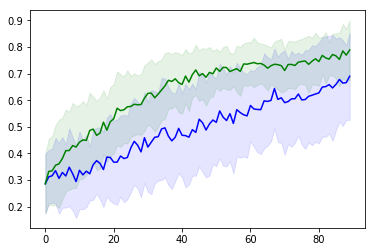

In [89]:
import os
import numpy as np
import matplotlib.pyplot as plt

path = './result_PESSL'
res = []

for f in os.listdir(path):
    filepath = os.path.join(path, f)
    
    if os.path.isfile(filepath) and 'brainin' in filepath:
        temp = np.load(filepath)
        res.append(temp[()]['S'])

mean = np.average(res, axis = 0)
var = np.var(res, axis = 0)

x = range(len(mean))

plt.plot(x, mean[:, 0], 'b')
plt.plot(x, mean[:, 1], 'g')
plt.fill_between(x, mean[:, 0] - np.sqrt(var[:, 0]), mean[:, 0] + np.sqrt(var[:, 0]), color = 'b', alpha = 0.1)
plt.fill_between(x, mean[:, 1] - np.sqrt(var[:, 1]), mean[:, 1] + np.sqrt(var[:, 1]), color = 'g', alpha = 0.1)
plt.show()

In [27]:
runs = 40
init_N = 10
num_Iter = 100
D = 10

for i in xrange(runs):
    fun = functions.sinc_simple10()
    R = PESSL(fun, 1, init_N, 100)
    R_random = PESSL(fun, 1, init_N, 100)
    R_random.data = copy.deepcopy(R.data)
    R_random.fitted_params = copy.deepcopy(R.fitted_params)
    R_random.xlist = copy.deepcopy(R.xlist)
    
    score = []
    mes = (lambda x, y : cos_vec(x, y))
    
    for j in xrange(num_Iter - init_N):
        vtrue = fun.W
            
        v1 = R.fitted_params['mu']
        v2 = R_random.fitted_params['mu']
        
        print 'RUN : ' + str(i + 1) + ' ' + 'ITER : ' + str(j + 1) + ' PESSL : ' + str(mes(vtrue, v1)) + ' RANDOM : ' + str(mes(vtrue, v2))
        
        R.iterate(100)
        R_random.iterate_random()
        
        score.append([mes(vtrue, v1) ,mes(vtrue, v2)])
    
    R.session.close()
    R_random.session.close()
    
    result = {'W' : vtrue,
              'X' : R.data['X'],
              'Y' : R.data['y'],
              'XR' : R_random.data['X'],
              'YR' : R_random.data['y'],
              'S' : np.array(score)}
    
    file_path = "./result_PESSL/sinc10D_" + str(i)
    
    directory = os.path.dirname(file_path)

    if not os.path.exists(directory):
        os.makedirs(directory)

    np.save(file_path, result)

RUN : 1 ITER : 1 PESSL : 0.373018238035 RANDOM : 0.373018238035
RUN : 1 ITER : 2 PESSL : 0.307138917154 RANDOM : 0.384057067014
RUN : 1 ITER : 3 PESSL : 0.431976355027 RANDOM : 0.00646225215811
RUN : 1 ITER : 4 PESSL : 0.624558030737 RANDOM : 0.140548807497
RUN : 1 ITER : 5 PESSL : 0.147771793941 RANDOM : 0.105843715626
RUN : 1 ITER : 6 PESSL : 0.0573739232951 RANDOM : 0.061580184732
RUN : 1 ITER : 7 PESSL : 0.398543042667 RANDOM : 0.0455198602129
RUN : 1 ITER : 8 PESSL : 0.108046173456 RANDOM : 0.024482182011
RUN : 1 ITER : 9 PESSL : 0.0829847779457 RANDOM : 0.119100619445
RUN : 1 ITER : 10 PESSL : 0.0689784566961 RANDOM : 0.477821009204
RUN : 1 ITER : 11 PESSL : 0.146142483633 RANDOM : 0.475199267604
RUN : 1 ITER : 12 PESSL : 0.0145837038897 RANDOM : 0.453674318978
RUN : 1 ITER : 13 PESSL : 0.142448214943 RANDOM : 0.530092714358
RUN : 1 ITER : 14 PESSL : 0.119538609 RANDOM : 0.513048117755
RUN : 1 ITER : 15 PESSL : 0.136501721344 RANDOM : 0.491197778948
RUN : 1 ITER : 16 PESSL : 0.39

RUN : 2 ITER : 36 PESSL : 0.419174843188 RANDOM : 0.590660381687
RUN : 2 ITER : 37 PESSL : 0.366029840998 RANDOM : 0.625578033635
RUN : 2 ITER : 38 PESSL : 0.0272851988268 RANDOM : 0.54708985747
RUN : 2 ITER : 39 PESSL : 0.399659740341 RANDOM : 0.376303133686
RUN : 2 ITER : 40 PESSL : 0.266789366247 RANDOM : 0.660112782474
RUN : 2 ITER : 41 PESSL : 0.333647112556 RANDOM : 0.658757132523
RUN : 2 ITER : 42 PESSL : 0.186611735884 RANDOM : 0.699323818041
RUN : 2 ITER : 43 PESSL : 0.277393365972 RANDOM : 0.703329814214
RUN : 2 ITER : 44 PESSL : 0.0375436914316 RANDOM : 0.676700795885
RUN : 2 ITER : 45 PESSL : 0.166736378262 RANDOM : 0.673784590688
RUN : 2 ITER : 46 PESSL : 0.271591790288 RANDOM : 0.684971248649
RUN : 2 ITER : 47 PESSL : 0.277745553377 RANDOM : 0.715613297347
RUN : 2 ITER : 48 PESSL : 0.0248007456265 RANDOM : 0.706957823452
RUN : 2 ITER : 49 PESSL : 0.295701735056 RANDOM : 0.655800039022
RUN : 2 ITER : 50 PESSL : 0.296984522333 RANDOM : 0.584600221442
RUN : 2 ITER : 51 PESSL

RUN : 3 ITER : 73 PESSL : 0.0110050205764 RANDOM : 0.087348714929
RUN : 3 ITER : 74 PESSL : 0.316480129097 RANDOM : 0.0338486625282
RUN : 3 ITER : 75 PESSL : 0.0429792632157 RANDOM : 0.655097912081
RUN : 3 ITER : 76 PESSL : 0.153448708154 RANDOM : 0.453855505838
RUN : 3 ITER : 77 PESSL : 0.0894422355018 RANDOM : 0.599316953321
RUN : 3 ITER : 78 PESSL : 0.108860688004 RANDOM : 0.27367588092
RUN : 3 ITER : 79 PESSL : 0.303954109752 RANDOM : 0.695820719648
RUN : 3 ITER : 80 PESSL : 0.564176140808 RANDOM : 0.421109655189
RUN : 3 ITER : 81 PESSL : 0.67591294075 RANDOM : 0.24809922924
RUN : 3 ITER : 82 PESSL : 0.213503756184 RANDOM : 0.376647577251
RUN : 3 ITER : 83 PESSL : 0.273345519901 RANDOM : 0.143408678257
RUN : 3 ITER : 84 PESSL : 0.0187281825018 RANDOM : 0.513630402306
RUN : 3 ITER : 85 PESSL : 0.160590970137 RANDOM : 0.26286869468
RUN : 3 ITER : 86 PESSL : 0.502623766472 RANDOM : 0.576302938557
RUN : 3 ITER : 87 PESSL : 0.253256945936 RANDOM : 0.0436684333306
RUN : 3 ITER : 88 PESSL

RUN : 5 ITER : 19 PESSL : 0.172318567004 RANDOM : 0.497743241965
RUN : 5 ITER : 20 PESSL : 0.130129576716 RANDOM : 0.330071995776
RUN : 5 ITER : 21 PESSL : 0.0211120125216 RANDOM : 0.300657954588
RUN : 5 ITER : 22 PESSL : 0.545802590599 RANDOM : 0.193525415661
RUN : 5 ITER : 23 PESSL : 0.0165100380671 RANDOM : 0.105833583424
RUN : 5 ITER : 24 PESSL : 0.439513420602 RANDOM : 0.20719189099
RUN : 5 ITER : 25 PESSL : 0.171463057923 RANDOM : 0.0980851401142
RUN : 5 ITER : 26 PESSL : 0.496426905174 RANDOM : 0.0576587214001
RUN : 5 ITER : 27 PESSL : 0.25299337623 RANDOM : 0.336254628269
RUN : 5 ITER : 28 PESSL : 0.116677549452 RANDOM : 0.508380606851
RUN : 5 ITER : 29 PESSL : 0.128346843522 RANDOM : 0.179435565179
RUN : 5 ITER : 30 PESSL : 0.225818532206 RANDOM : 0.306358058984
RUN : 5 ITER : 31 PESSL : 0.304897728636 RANDOM : 0.130873166876
RUN : 5 ITER : 32 PESSL : 0.0100801060238 RANDOM : 0.344451704322
RUN : 5 ITER : 33 PESSL : 0.590625584875 RANDOM : 0.0452188261767
RUN : 5 ITER : 34 PES

RUN : 6 ITER : 54 PESSL : 0.519248423535 RANDOM : 0.13254296366
RUN : 6 ITER : 55 PESSL : 0.133965117539 RANDOM : 0.533225889749
RUN : 6 ITER : 56 PESSL : 0.232882454788 RANDOM : 0.570069406868
RUN : 6 ITER : 57 PESSL : 0.235111494906 RANDOM : 0.0772724638615
RUN : 6 ITER : 58 PESSL : 0.0946912382599 RANDOM : 0.665563847389
RUN : 6 ITER : 59 PESSL : 0.104925066996 RANDOM : 0.459882010408
RUN : 6 ITER : 60 PESSL : 0.150063747372 RANDOM : 0.465196041944
RUN : 6 ITER : 61 PESSL : 0.513100953449 RANDOM : 0.0698465853623
RUN : 6 ITER : 62 PESSL : 0.143749193334 RANDOM : 0.0734941816677
RUN : 6 ITER : 63 PESSL : 0.09644909432 RANDOM : 0.604255997939
RUN : 6 ITER : 64 PESSL : 0.0805490363586 RANDOM : 0.171111063449
RUN : 6 ITER : 65 PESSL : 0.353880398847 RANDOM : 0.435045773109
RUN : 6 ITER : 66 PESSL : 0.195352914181 RANDOM : 0.602217256331
RUN : 6 ITER : 67 PESSL : 0.108269715679 RANDOM : 0.126368289351
RUN : 6 ITER : 68 PESSL : 0.346524549459 RANDOM : 0.14087076748
RUN : 6 ITER : 69 PESSL

RUN : 7 ITER : 71 PESSL : 0.999999974113 RANDOM : 0.00158415988853
RUN : 7 ITER : 72 PESSL : 0.999999456356 RANDOM : 0.025747758494
RUN : 7 ITER : 73 PESSL : 0.799382968761 RANDOM : 0.0723722471731
RUN : 7 ITER : 74 PESSL : 0.902714583209 RANDOM : 0.3095043547
RUN : 7 ITER : 75 PESSL : 0.999999997446 RANDOM : 0.56684107562
RUN : 7 ITER : 76 PESSL : 0.778326455132 RANDOM : 0.331680670826
RUN : 7 ITER : 77 PESSL : 0.865297370952 RANDOM : 0.281652715066
RUN : 7 ITER : 78 PESSL : 0.916718018227 RANDOM : 0.00739137430417
RUN : 7 ITER : 79 PESSL : 0.91075368503 RANDOM : 0.232531381772
RUN : 7 ITER : 80 PESSL : 0.911305927279 RANDOM : 0.408675796629
RUN : 7 ITER : 81 PESSL : 0.902744943511 RANDOM : 0.129615544393
RUN : 7 ITER : 82 PESSL : 0.746134171091 RANDOM : 0.690965583529
RUN : 7 ITER : 83 PESSL : 0.907419886458 RANDOM : 0.383298181677
RUN : 7 ITER : 84 PESSL : 0.909333372524 RANDOM : 0.562120534536
RUN : 7 ITER : 85 PESSL : 0.999900896073 RANDOM : 0.502951197788
RUN : 7 ITER : 86 PESSL 

RUN : 8 ITER : 74 PESSL : 0.0880227189208 RANDOM : 0.999999997794
RUN : 8 ITER : 75 PESSL : 0.0493077440805 RANDOM : 0.999999997981
RUN : 8 ITER : 76 PESSL : 0.100465096434 RANDOM : 0.999999999807
RUN : 8 ITER : 77 PESSL : 0.330241697995 RANDOM : 0.999999992082
RUN : 8 ITER : 78 PESSL : 0.521390861287 RANDOM : 0.999999999655
RUN : 8 ITER : 79 PESSL : 0.0445639987336 RANDOM : 0.999999999702
RUN : 8 ITER : 80 PESSL : 0.217210942226 RANDOM : 0.999999997844
RUN : 8 ITER : 81 PESSL : 0.198336756168 RANDOM : 0.999999999067
RUN : 8 ITER : 82 PESSL : 0.180351259286 RANDOM : 0.99999998052
RUN : 8 ITER : 83 PESSL : 0.126348302751 RANDOM : 0.999999925341
RUN : 8 ITER : 84 PESSL : 0.0890320388639 RANDOM : 0.999999997867
RUN : 8 ITER : 85 PESSL : 0.172221929803 RANDOM : 0.99999999889
RUN : 8 ITER : 86 PESSL : 0.0277298717416 RANDOM : 0.999999996996
RUN : 8 ITER : 87 PESSL : 0.119687619953 RANDOM : 0.999999997704
RUN : 8 ITER : 88 PESSL : 0.0241457122986 RANDOM : 0.999999999937
RUN : 8 ITER : 89 PES

RUN : 9 ITER : 77 PESSL : 0.139139493699 RANDOM : 0.999999987949
RUN : 9 ITER : 78 PESSL : 0.581196629914 RANDOM : 0.99999999944
RUN : 9 ITER : 79 PESSL : 0.441643466736 RANDOM : 0.983066252171
RUN : 9 ITER : 80 PESSL : 0.42663529671 RANDOM : 0.999999999795
RUN : 9 ITER : 81 PESSL : 0.106843911324 RANDOM : 0.999999947197
RUN : 9 ITER : 82 PESSL : 0.307765366583 RANDOM : 0.999999999219
RUN : 9 ITER : 83 PESSL : 0.150710906129 RANDOM : 0.999999993866
RUN : 9 ITER : 84 PESSL : 0.163058090453 RANDOM : 0.999999997918
RUN : 9 ITER : 85 PESSL : 0.500193063703 RANDOM : 0.999999996303
RUN : 9 ITER : 86 PESSL : 0.0486979964013 RANDOM : 0.999999993487
RUN : 9 ITER : 87 PESSL : 0.358691756279 RANDOM : 0.633927091888
RUN : 9 ITER : 88 PESSL : 0.189599012836 RANDOM : 0.636865605597
RUN : 9 ITER : 89 PESSL : 0.199523888374 RANDOM : 0.99999997065
RUN : 9 ITER : 90 PESSL : 0.339357371213 RANDOM : 0.999999922663
RUN : 10 ITER : 1 PESSL : 0.254015180312 RANDOM : 0.254015180312
RUN : 10 ITER : 2 PESSL : 0

RUN : 11 ITER : 22 PESSL : 0.330550915263 RANDOM : 0.473524468969
RUN : 11 ITER : 23 PESSL : 0.0600625698347 RANDOM : 0.0579420065398
RUN : 11 ITER : 24 PESSL : 0.211042261785 RANDOM : 0.358794304226
RUN : 11 ITER : 25 PESSL : 0.218402064852 RANDOM : 0.0773021314201
RUN : 11 ITER : 26 PESSL : 0.230119656078 RANDOM : 0.253102826219
RUN : 11 ITER : 27 PESSL : 0.0679425360747 RANDOM : 0.184004448014
RUN : 11 ITER : 28 PESSL : 0.180714805866 RANDOM : 0.298369898975
RUN : 11 ITER : 29 PESSL : 0.132041051917 RANDOM : 0.169558966265
RUN : 11 ITER : 30 PESSL : 0.189202929503 RANDOM : 0.215043067121
RUN : 11 ITER : 31 PESSL : 0.135300772327 RANDOM : 0.10273129689
RUN : 11 ITER : 32 PESSL : 0.109248542117 RANDOM : 0.0472888728971
RUN : 11 ITER : 33 PESSL : 0.0673747940914 RANDOM : 0.0300752760555
RUN : 11 ITER : 34 PESSL : 0.372890992739 RANDOM : 0.46256158365
RUN : 11 ITER : 35 PESSL : 0.181839441162 RANDOM : 0.17889181904
RUN : 11 ITER : 36 PESSL : 0.281407711531 RANDOM : 0.269503383695
RUN : 

RUN : 12 ITER : 55 PESSL : 0.678189932337 RANDOM : 0.863569069394
RUN : 12 ITER : 56 PESSL : 0.677904177769 RANDOM : 0.905856941201
RUN : 12 ITER : 57 PESSL : 0.71173024106 RANDOM : 0.891675656037
RUN : 12 ITER : 58 PESSL : 0.528307499633 RANDOM : 0.91000429788
RUN : 12 ITER : 59 PESSL : 0.505884782263 RANDOM : 0.912674723809
RUN : 12 ITER : 60 PESSL : 0.30974862454 RANDOM : 0.887628423112
RUN : 12 ITER : 61 PESSL : 0.676716786236 RANDOM : 0.62308644683
RUN : 12 ITER : 62 PESSL : 0.727662780205 RANDOM : 0.850193043036
RUN : 12 ITER : 63 PESSL : 0.657924393571 RANDOM : 0.961133548588
RUN : 12 ITER : 64 PESSL : 0.709563262997 RANDOM : 0.913222540666
RUN : 12 ITER : 65 PESSL : 0.598362373832 RANDOM : 0.896248769299
RUN : 12 ITER : 66 PESSL : 0.839616419538 RANDOM : 0.933055567894
RUN : 12 ITER : 67 PESSL : 0.806852339411 RANDOM : 0.605342492627
RUN : 12 ITER : 68 PESSL : 0.550662665359 RANDOM : 0.716042551412
RUN : 12 ITER : 69 PESSL : 0.638204796071 RANDOM : 0.820330161404
RUN : 12 ITER 

RUN : 13 ITER : 87 PESSL : 0.373143314445 RANDOM : 0.633618402194
RUN : 13 ITER : 88 PESSL : 0.069085455258 RANDOM : 0.558894672677
RUN : 13 ITER : 89 PESSL : 0.0605274734342 RANDOM : 0.0443615107271
RUN : 13 ITER : 90 PESSL : 0.182962288183 RANDOM : 0.134906798774
RUN : 14 ITER : 1 PESSL : 0.577943389083 RANDOM : 0.577943389083
RUN : 14 ITER : 2 PESSL : 0.631291545566 RANDOM : 0.226515990856
RUN : 14 ITER : 3 PESSL : 0.612909822968 RANDOM : 0.115822172766
RUN : 14 ITER : 4 PESSL : 0.399546140388 RANDOM : 0.340477550073
RUN : 14 ITER : 5 PESSL : 0.322631976232 RANDOM : 0.290548963866
RUN : 14 ITER : 6 PESSL : 0.432542092675 RANDOM : 0.0564237842686
RUN : 14 ITER : 7 PESSL : 0.475703620828 RANDOM : 0.103648028221
RUN : 14 ITER : 8 PESSL : 0.192671029762 RANDOM : 0.510509736803
RUN : 14 ITER : 9 PESSL : 0.184526474458 RANDOM : 0.511969478613
RUN : 14 ITER : 10 PESSL : 0.051839100408 RANDOM : 0.577520995685
RUN : 14 ITER : 11 PESSL : 0.189184418637 RANDOM : 0.693302733638
RUN : 14 ITER : 

RUN : 14 ITER : 88 PESSL : 0.0524767353166 RANDOM : 0.999999980571
RUN : 14 ITER : 89 PESSL : 0.2270699643 RANDOM : 0.99999999091
RUN : 14 ITER : 90 PESSL : 0.0837959778978 RANDOM : 0.999999729775
RUN : 15 ITER : 1 PESSL : 0.00193861641439 RANDOM : 0.00193861641439
RUN : 15 ITER : 2 PESSL : 0.0328345066089 RANDOM : 0.163890199779
RUN : 15 ITER : 3 PESSL : 0.0758275197695 RANDOM : 0.303839029791
RUN : 15 ITER : 4 PESSL : 0.0325622833181 RANDOM : 0.111798675846
RUN : 15 ITER : 5 PESSL : 0.0124252600981 RANDOM : 0.380635974851
RUN : 15 ITER : 6 PESSL : 0.301352091268 RANDOM : 0.122376125298
RUN : 15 ITER : 7 PESSL : 0.0964823814399 RANDOM : 0.637469240611
RUN : 15 ITER : 8 PESSL : 0.145104654966 RANDOM : 0.14358334931
RUN : 15 ITER : 9 PESSL : 0.0867913888848 RANDOM : 0.0897105071879
RUN : 15 ITER : 10 PESSL : 0.0672464135557 RANDOM : 0.195842515601
RUN : 15 ITER : 11 PESSL : 0.09929250787 RANDOM : 0.0733852670641
RUN : 15 ITER : 12 PESSL : 0.0800170284261 RANDOM : 0.133742362405
RUN : 15

RUN : 16 ITER : 15 PESSL : 0.111909124045 RANDOM : 0.0925166806649
RUN : 16 ITER : 16 PESSL : 0.0606917563944 RANDOM : 0.397394130889
RUN : 16 ITER : 17 PESSL : 0.124562565424 RANDOM : 0.370536650619
RUN : 16 ITER : 18 PESSL : 0.238828685123 RANDOM : 0.219930966915
RUN : 16 ITER : 19 PESSL : 0.202512300709 RANDOM : 0.39439683824
RUN : 16 ITER : 20 PESSL : 0.231336125118 RANDOM : 0.108521925181
RUN : 16 ITER : 21 PESSL : 0.00137461186405 RANDOM : 0.0539390248068
RUN : 16 ITER : 22 PESSL : 0.0368482549193 RANDOM : 0.139005336291
RUN : 16 ITER : 23 PESSL : 0.196310227628 RANDOM : 0.0887876145171
RUN : 16 ITER : 24 PESSL : 0.024892513158 RANDOM : 0.00872442047627
RUN : 16 ITER : 25 PESSL : 0.155028589963 RANDOM : 0.0131869792589
RUN : 16 ITER : 26 PESSL : 0.223978513456 RANDOM : 0.0297994173734
RUN : 16 ITER : 27 PESSL : 0.130011824551 RANDOM : 0.678833268424
RUN : 16 ITER : 28 PESSL : 0.132980332555 RANDOM : 0.458210287588
RUN : 16 ITER : 29 PESSL : 0.249134836657 RANDOM : 0.08867301593
R

RUN : 17 ITER : 48 PESSL : 0.604137778909 RANDOM : 0.413884735094
RUN : 17 ITER : 49 PESSL : 0.655725009443 RANDOM : 0.57929150661
RUN : 17 ITER : 50 PESSL : 0.650110307476 RANDOM : 0.163045920222
RUN : 17 ITER : 51 PESSL : 0.677881735078 RANDOM : 0.130154596192
RUN : 17 ITER : 52 PESSL : 0.615921409891 RANDOM : 0.0832262770599
RUN : 17 ITER : 53 PESSL : 0.650110733537 RANDOM : 0.246886722353
RUN : 17 ITER : 54 PESSL : 0.666229532003 RANDOM : 0.71026702336
RUN : 17 ITER : 55 PESSL : 0.551494220088 RANDOM : 0.0167154719464
RUN : 17 ITER : 56 PESSL : 0.714095722718 RANDOM : 0.836123860976
RUN : 17 ITER : 57 PESSL : 0.415049132707 RANDOM : 0.902969460823
RUN : 17 ITER : 58 PESSL : 0.645972672147 RANDOM : 0.999999999918
RUN : 17 ITER : 59 PESSL : 0.692345923786 RANDOM : 0.933929774925
RUN : 17 ITER : 60 PESSL : 0.886066152125 RANDOM : 0.999999999857
RUN : 17 ITER : 61 PESSL : 0.827010259214 RANDOM : 0.384056233548
RUN : 17 ITER : 62 PESSL : 0.828469942574 RANDOM : 0.999385050893
RUN : 17 I

RUN : 18 ITER : 66 PESSL : 0.0121445772371 RANDOM : 0.210481286167
RUN : 18 ITER : 67 PESSL : 0.128747664267 RANDOM : 0.150862939979
RUN : 18 ITER : 68 PESSL : 0.188276679301 RANDOM : 0.150712250276
RUN : 18 ITER : 69 PESSL : 0.0635204575795 RANDOM : 0.445147897548
RUN : 18 ITER : 70 PESSL : 0.576685888883 RANDOM : 0.106603739507
RUN : 18 ITER : 71 PESSL : 0.212965812916 RANDOM : 0.428345278736
RUN : 18 ITER : 72 PESSL : 0.0263579868501 RANDOM : 0.211999728856
RUN : 18 ITER : 73 PESSL : 0.0626834860299 RANDOM : 0.455840457937
RUN : 18 ITER : 74 PESSL : 0.000360228889644 RANDOM : 0.272930694543
RUN : 18 ITER : 75 PESSL : 0.170890522334 RANDOM : 0.262096699109
RUN : 18 ITER : 76 PESSL : 0.0398439553293 RANDOM : 0.412333949418
RUN : 18 ITER : 77 PESSL : 0.352219193769 RANDOM : 0.391316691843
RUN : 18 ITER : 78 PESSL : 0.125806362334 RANDOM : 0.45759245692
RUN : 18 ITER : 79 PESSL : 0.0602364926191 RANDOM : 0.0308314260734
RUN : 18 ITER : 80 PESSL : 0.0637827373434 RANDOM : 0.395685219188


RUN : 20 ITER : 9 PESSL : 0.536874252849 RANDOM : 0.256807472891
RUN : 20 ITER : 10 PESSL : 0.208612124081 RANDOM : 0.314750866896
RUN : 20 ITER : 11 PESSL : 0.337658972117 RANDOM : 0.0401493735071
RUN : 20 ITER : 12 PESSL : 0.288624312987 RANDOM : 0.266397204775
RUN : 20 ITER : 13 PESSL : 0.568613693737 RANDOM : 0.339534973332
RUN : 20 ITER : 14 PESSL : 0.234792715734 RANDOM : 0.212166440557
RUN : 20 ITER : 15 PESSL : 0.434643140818 RANDOM : 0.29806739627
RUN : 20 ITER : 16 PESSL : 0.23858034403 RANDOM : 0.00353880470119
RUN : 20 ITER : 17 PESSL : 0.394709663987 RANDOM : 0.139081241803
RUN : 20 ITER : 18 PESSL : 0.126431184758 RANDOM : 0.116513654635
RUN : 20 ITER : 19 PESSL : 0.240379741972 RANDOM : 0.23318559155
RUN : 20 ITER : 20 PESSL : 0.671105635434 RANDOM : 0.37149646307
RUN : 20 ITER : 21 PESSL : 0.218714937161 RANDOM : 0.468886664394
RUN : 20 ITER : 22 PESSL : 0.162816126321 RANDOM : 0.182532582495
RUN : 20 ITER : 23 PESSL : 0.113358575533 RANDOM : 0.278368441273
RUN : 20 ITE

RUN : 21 ITER : 43 PESSL : 0.222006928213 RANDOM : 0.3858469724
RUN : 21 ITER : 44 PESSL : 0.283941964663 RANDOM : 0.362536406696
RUN : 21 ITER : 45 PESSL : 0.2163740267 RANDOM : 0.0229817568295
RUN : 21 ITER : 46 PESSL : 0.179474612319 RANDOM : 0.513853482904
RUN : 21 ITER : 47 PESSL : 0.201120689006 RANDOM : 0.432325662214
RUN : 21 ITER : 48 PESSL : 0.323938079153 RANDOM : 0.32268072674
RUN : 21 ITER : 49 PESSL : 0.135504145228 RANDOM : 0.366319747291
RUN : 21 ITER : 50 PESSL : 0.466578066951 RANDOM : 0.160461359073
RUN : 21 ITER : 51 PESSL : 0.161263414867 RANDOM : 0.208214047487
RUN : 21 ITER : 52 PESSL : 0.488438908531 RANDOM : 0.3171786062
RUN : 21 ITER : 53 PESSL : 0.335404815521 RANDOM : 0.260490960894
RUN : 21 ITER : 54 PESSL : 0.21650759982 RANDOM : 0.46818751949
RUN : 21 ITER : 55 PESSL : 0.664412002286 RANDOM : 0.287081572205
RUN : 21 ITER : 56 PESSL : 0.652428749538 RANDOM : 0.594941934767
RUN : 21 ITER : 57 PESSL : 0.057263201217 RANDOM : 0.254397173641
RUN : 21 ITER : 58

RUN : 22 ITER : 78 PESSL : 0.240447423491 RANDOM : 0.9999999969
RUN : 22 ITER : 79 PESSL : 0.372449433233 RANDOM : 0.999999993233
RUN : 22 ITER : 80 PESSL : 0.326830583837 RANDOM : 0.999999999188
RUN : 22 ITER : 81 PESSL : 0.0454659710065 RANDOM : 0.999999997686
RUN : 22 ITER : 82 PESSL : 0.677309014684 RANDOM : 0.999999999369
RUN : 22 ITER : 83 PESSL : 0.234917876268 RANDOM : 0.99999999379
RUN : 22 ITER : 84 PESSL : 0.236185121191 RANDOM : 0.999999998357
RUN : 22 ITER : 85 PESSL : 0.593505199751 RANDOM : 0.999999937255
RUN : 22 ITER : 86 PESSL : 0.197856570906 RANDOM : 0.999999969016
RUN : 22 ITER : 87 PESSL : 0.497587553254 RANDOM : 0.999999919155
RUN : 22 ITER : 88 PESSL : 0.179343578768 RANDOM : 0.999999997281
RUN : 22 ITER : 89 PESSL : 0.248766100084 RANDOM : 0.999999973265
RUN : 22 ITER : 90 PESSL : 0.0378035977654 RANDOM : 0.999999993334
RUN : 23 ITER : 1 PESSL : 0.363800092552 RANDOM : 0.363800092552
RUN : 23 ITER : 2 PESSL : 0.180834346341 RANDOM : 0.438960537938
RUN : 23 ITER

RUN : 23 ITER : 80 PESSL : 0.799332925732 RANDOM : 0.184145669798
RUN : 23 ITER : 81 PESSL : 0.764588024678 RANDOM : 0.737257482716
RUN : 23 ITER : 82 PESSL : 0.670152711938 RANDOM : 0.168332450617
RUN : 23 ITER : 83 PESSL : 0.081039035903 RANDOM : 0.382560477286
RUN : 23 ITER : 84 PESSL : 0.381658907144 RANDOM : 0.3457450516
RUN : 23 ITER : 85 PESSL : 0.348256046395 RANDOM : 0.343295098121
RUN : 23 ITER : 86 PESSL : 0.0411799055866 RANDOM : 0.128607776828
RUN : 23 ITER : 87 PESSL : 0.675808129621 RANDOM : 0.28981056186
RUN : 23 ITER : 88 PESSL : 0.682752198732 RANDOM : 0.468005770716
RUN : 23 ITER : 89 PESSL : 0.794594181531 RANDOM : 0.445845128671
RUN : 23 ITER : 90 PESSL : 0.719424624457 RANDOM : 0.0271141981533
RUN : 24 ITER : 1 PESSL : 0.0196237889662 RANDOM : 0.0196237889662
RUN : 24 ITER : 2 PESSL : 0.136707494022 RANDOM : 0.138441938952
RUN : 24 ITER : 3 PESSL : 0.0999218415795 RANDOM : 0.0493244712424
RUN : 24 ITER : 4 PESSL : 0.118265341208 RANDOM : 0.155287678393
RUN : 24 IT

RUN : 25 ITER : 23 PESSL : 0.356320054323 RANDOM : 0.278590095473
RUN : 25 ITER : 24 PESSL : 0.0573106054325 RANDOM : 0.390001118401
RUN : 25 ITER : 25 PESSL : 0.00723123789108 RANDOM : 0.415556216862
RUN : 25 ITER : 26 PESSL : 0.0194198740623 RANDOM : 0.193019148425
RUN : 25 ITER : 27 PESSL : 0.101404733869 RANDOM : 0.293005927175
RUN : 25 ITER : 28 PESSL : 0.236393687742 RANDOM : 0.445209906482
RUN : 25 ITER : 29 PESSL : 0.00604674170241 RANDOM : 0.134544460939
RUN : 25 ITER : 30 PESSL : 0.0119288125179 RANDOM : 0.305052420721
RUN : 25 ITER : 31 PESSL : 0.0671954250597 RANDOM : 0.529988641694
RUN : 25 ITER : 32 PESSL : 0.14962158054 RANDOM : 0.452214143288
RUN : 25 ITER : 33 PESSL : 0.422801628991 RANDOM : 0.549725961047
RUN : 25 ITER : 34 PESSL : 0.00336697068359 RANDOM : 0.430438003292
RUN : 25 ITER : 35 PESSL : 0.259374928677 RANDOM : 0.746952159358
RUN : 25 ITER : 36 PESSL : 0.726445953357 RANDOM : 0.318026164992
RUN : 25 ITER : 37 PESSL : 0.374943534889 RANDOM : 0.146086816026
R

RUN : 26 ITER : 55 PESSL : 0.105269372235 RANDOM : 0.275607629404
RUN : 26 ITER : 56 PESSL : 0.541549927401 RANDOM : 0.0682148731836
RUN : 26 ITER : 57 PESSL : 0.0442509537918 RANDOM : 0.27119493462
RUN : 26 ITER : 58 PESSL : 0.221397171398 RANDOM : 0.0699417378629
RUN : 26 ITER : 59 PESSL : 0.0761555467786 RANDOM : 0.271967373065
RUN : 26 ITER : 60 PESSL : 0.457508596386 RANDOM : 0.118981913121
RUN : 26 ITER : 61 PESSL : 0.200955401671 RANDOM : 0.221552961516
RUN : 26 ITER : 62 PESSL : 0.179156549724 RANDOM : 0.0191653256296
RUN : 26 ITER : 63 PESSL : 0.248436875554 RANDOM : 0.51034505466
RUN : 26 ITER : 64 PESSL : 0.210992403853 RANDOM : 0.339117347482
RUN : 26 ITER : 65 PESSL : 0.16516762058 RANDOM : 0.408452823824
RUN : 26 ITER : 66 PESSL : 0.023009448105 RANDOM : 0.336387758048
RUN : 26 ITER : 67 PESSL : 0.126608975527 RANDOM : 0.372184370518
RUN : 26 ITER : 68 PESSL : 0.0522148613696 RANDOM : 0.00117934029535
RUN : 26 ITER : 69 PESSL : 0.000200416877511 RANDOM : 0.11654905113
RUN

RUN : 27 ITER : 88 PESSL : 0.602078854393 RANDOM : 0.426052722786
RUN : 27 ITER : 89 PESSL : 0.604513332207 RANDOM : 0.156531884757
RUN : 27 ITER : 90 PESSL : 0.151673091981 RANDOM : 0.663485921782
RUN : 28 ITER : 1 PESSL : 0.210482915609 RANDOM : 0.210482915609
RUN : 28 ITER : 2 PESSL : 0.26056652361 RANDOM : 0.147466550503
RUN : 28 ITER : 3 PESSL : 0.192801165043 RANDOM : 0.0250557631524
RUN : 28 ITER : 4 PESSL : 0.0763353479122 RANDOM : 0.0993932037686
RUN : 28 ITER : 5 PESSL : 0.0252079390565 RANDOM : 0.291107284958
RUN : 28 ITER : 6 PESSL : 0.207352213327 RANDOM : 0.367752456962
RUN : 28 ITER : 7 PESSL : 0.0742339333416 RANDOM : 0.00581308356312
RUN : 28 ITER : 8 PESSL : 0.0681287419567 RANDOM : 0.0154354355664
RUN : 28 ITER : 9 PESSL : 0.126311573721 RANDOM : 0.0309460113233
RUN : 28 ITER : 10 PESSL : 0.164512659694 RANDOM : 0.258033020455
RUN : 28 ITER : 11 PESSL : 0.140502501056 RANDOM : 0.190477509923
RUN : 28 ITER : 12 PESSL : 0.075827952971 RANDOM : 0.362570467317
RUN : 28 I

RUN : 28 ITER : 74 PESSL : 0.999999998034 RANDOM : 0.582050540702
RUN : 28 ITER : 75 PESSL : 0.999999966253 RANDOM : 0.594866248117
RUN : 28 ITER : 76 PESSL : 0.999999999555 RANDOM : 0.180156431816
RUN : 28 ITER : 77 PESSL : 0.940034872463 RANDOM : 0.862515152158
RUN : 28 ITER : 78 PESSL : 0.937507995656 RANDOM : 0.626864060941
RUN : 28 ITER : 79 PESSL : 0.285860598752 RANDOM : 0.810387771732
RUN : 28 ITER : 80 PESSL : 0.952272280093 RANDOM : 0.536693190038
RUN : 28 ITER : 81 PESSL : 0.945318625328 RANDOM : 0.125989761547
RUN : 28 ITER : 82 PESSL : 0.947751367647 RANDOM : 0.638942807981
RUN : 28 ITER : 83 PESSL : 0.980547740014 RANDOM : 0.194821854389
RUN : 28 ITER : 84 PESSL : 0.941526568956 RANDOM : 0.238993302141
RUN : 28 ITER : 85 PESSL : 0.949588503299 RANDOM : 0.350882288148
RUN : 28 ITER : 86 PESSL : 0.937248132529 RANDOM : 0.329131409998
RUN : 28 ITER : 87 PESSL : 0.946846122599 RANDOM : 0.0179661249164
RUN : 28 ITER : 88 PESSL : 0.944195467497 RANDOM : 0.238298557495
RUN : 28 

RUN : 29 ITER : 54 PESSL : 0.999999994277 RANDOM : 0.248718352031
RUN : 29 ITER : 55 PESSL : 0.999999967833 RANDOM : 0.112624983942
RUN : 29 ITER : 56 PESSL : 0.999999967076 RANDOM : 0.0483126282783
RUN : 29 ITER : 57 PESSL : 0.999999970262 RANDOM : 0.18299450914
RUN : 29 ITER : 58 PESSL : 0.99999997472 RANDOM : 0.179292289016
RUN : 29 ITER : 59 PESSL : 0.999999967769 RANDOM : 0.401042277881
RUN : 29 ITER : 60 PESSL : 0.999999989283 RANDOM : 0.33544423504
RUN : 29 ITER : 61 PESSL : 0.999999978485 RANDOM : 0.28772390016
RUN : 29 ITER : 62 PESSL : 0.999999954484 RANDOM : 0.309785285206
RUN : 29 ITER : 63 PESSL : 0.999999970436 RANDOM : 0.328210804819
RUN : 29 ITER : 64 PESSL : 0.99999998022 RANDOM : 0.259339021899
RUN : 29 ITER : 65 PESSL : 0.999999979695 RANDOM : 0.345514229305
RUN : 29 ITER : 66 PESSL : 0.999999930333 RANDOM : 0.0744414065131
RUN : 29 ITER : 67 PESSL : 0.999999899446 RANDOM : 0.266567722436
RUN : 29 ITER : 68 PESSL : 0.999999916296 RANDOM : 0.0488009200871
RUN : 29 ITE

RUN : 30 ITER : 23 PESSL : 0.33163820427 RANDOM : 0.13478076881
RUN : 30 ITER : 24 PESSL : 0.207743577044 RANDOM : 0.363185446432
RUN : 30 ITER : 25 PESSL : 0.142626937171 RANDOM : 0.416420936449
RUN : 30 ITER : 26 PESSL : 0.635771354583 RANDOM : 0.319376303143
RUN : 30 ITER : 27 PESSL : 0.756811348635 RANDOM : 0.784313379508
RUN : 30 ITER : 28 PESSL : 0.725369741098 RANDOM : 0.245455294151
RUN : 30 ITER : 29 PESSL : 0.807578871091 RANDOM : 0.163230778587
RUN : 30 ITER : 30 PESSL : 0.718382814128 RANDOM : 0.0192919451655
RUN : 30 ITER : 31 PESSL : 0.708372545963 RANDOM : 0.676923080251
RUN : 30 ITER : 32 PESSL : 0.809705234259 RANDOM : 0.183601080428
RUN : 30 ITER : 33 PESSL : 0.735772744785 RANDOM : 0.0775386050258
RUN : 30 ITER : 34 PESSL : 0.667554921303 RANDOM : 0.733462336863
RUN : 30 ITER : 35 PESSL : 0.686591276382 RANDOM : 0.272399811593
RUN : 30 ITER : 36 PESSL : 0.748235799179 RANDOM : 0.00181206661962
RUN : 30 ITER : 37 PESSL : 0.730033178284 RANDOM : 0.0318161460219
RUN : 3

RUN : 30 ITER : 90 PESSL : 0.999999996557 RANDOM : 0.999999999254
RUN : 31 ITER : 1 PESSL : 0.295901339323 RANDOM : 0.295901339323
RUN : 31 ITER : 2 PESSL : 0.0653825114058 RANDOM : 0.403931158984
RUN : 31 ITER : 3 PESSL : 0.37319826173 RANDOM : 0.310133984903
RUN : 31 ITER : 4 PESSL : 0.0811491883013 RANDOM : 0.345095096908
RUN : 31 ITER : 5 PESSL : 0.242918695599 RANDOM : 0.0630083829637
RUN : 31 ITER : 6 PESSL : 0.00641671511059 RANDOM : 0.174071342509
RUN : 31 ITER : 7 PESSL : 0.214152826053 RANDOM : 0.13964654661
RUN : 31 ITER : 8 PESSL : 0.273287011827 RANDOM : 0.416631832916
RUN : 31 ITER : 9 PESSL : 0.216698860126 RANDOM : 0.243273027134
RUN : 31 ITER : 10 PESSL : 0.297529065146 RANDOM : 0.0542799743663
RUN : 31 ITER : 11 PESSL : 0.180560760223 RANDOM : 0.124518676186
RUN : 31 ITER : 12 PESSL : 0.200976908925 RANDOM : 0.382957452091
RUN : 31 ITER : 13 PESSL : 0.11811728923 RANDOM : 0.292246479967
RUN : 31 ITER : 14 PESSL : 0.0491937241846 RANDOM : 0.404747662786
RUN : 31 ITER :

RUN : 32 ITER : 18 PESSL : 0.0664436320303 RANDOM : 0.114561989145
RUN : 32 ITER : 19 PESSL : 0.0240922334159 RANDOM : 0.5662417018
RUN : 32 ITER : 20 PESSL : 0.124826510168 RANDOM : 0.18585037105
RUN : 32 ITER : 21 PESSL : 0.0436899584453 RANDOM : 0.345735171109
RUN : 32 ITER : 22 PESSL : 0.118202281567 RANDOM : 0.696897508808
RUN : 32 ITER : 23 PESSL : 0.183136999476 RANDOM : 0.613114640324
RUN : 32 ITER : 24 PESSL : 0.132221030552 RANDOM : 0.183806289211
RUN : 32 ITER : 25 PESSL : 0.0795096880221 RANDOM : 0.101660209886
RUN : 32 ITER : 26 PESSL : 0.139890516202 RANDOM : 0.386376079625
RUN : 32 ITER : 27 PESSL : 0.133436256279 RANDOM : 0.0468537027757
RUN : 32 ITER : 28 PESSL : 0.257725069342 RANDOM : 0.0986849384459
RUN : 32 ITER : 29 PESSL : 0.275669638417 RANDOM : 0.0873606685867
RUN : 32 ITER : 30 PESSL : 0.164383628193 RANDOM : 0.529011409254
RUN : 32 ITER : 31 PESSL : 0.116467605906 RANDOM : 0.0312141505481
RUN : 32 ITER : 32 PESSL : 0.231324188197 RANDOM : 0.114497020141
RUN :

RUN : 33 ITER : 32 PESSL : 0.117675778479 RANDOM : 0.0535274255644
RUN : 33 ITER : 33 PESSL : 0.0107476818059 RANDOM : 0.277831108401
RUN : 33 ITER : 34 PESSL : 0.256382651944 RANDOM : 0.274849938799
RUN : 33 ITER : 35 PESSL : 0.0991388658746 RANDOM : 0.506903502119
RUN : 33 ITER : 36 PESSL : 0.169392927614 RANDOM : 0.63011387313
RUN : 33 ITER : 37 PESSL : 0.14271271756 RANDOM : 0.4749946849
RUN : 33 ITER : 38 PESSL : 0.000630876139464 RANDOM : 0.441468273515
RUN : 33 ITER : 39 PESSL : 0.0880943933414 RANDOM : 0.486169050927
RUN : 33 ITER : 40 PESSL : 0.240426569185 RANDOM : 0.340995791019
RUN : 33 ITER : 41 PESSL : 0.314542021795 RANDOM : 0.232621618625
RUN : 33 ITER : 42 PESSL : 0.41655526631 RANDOM : 0.624166512534
RUN : 33 ITER : 43 PESSL : 0.0524111970166 RANDOM : 0.667524627348
RUN : 33 ITER : 44 PESSL : 0.14338867221 RANDOM : 0.103747687396
RUN : 33 ITER : 45 PESSL : 0.0472841852541 RANDOM : 0.175799901339
RUN : 33 ITER : 46 PESSL : 0.331416325965 RANDOM : 0.570697020931
RUN : 3

RUN : 34 ITER : 49 PESSL : 0.806006630792 RANDOM : 0.0910992854657
RUN : 34 ITER : 50 PESSL : 0.361215006452 RANDOM : 0.0106235119545
RUN : 34 ITER : 51 PESSL : 0.182566469633 RANDOM : 0.434239094683
RUN : 34 ITER : 52 PESSL : 0.23315695164 RANDOM : 0.261680444688
RUN : 34 ITER : 53 PESSL : 0.0521827167697 RANDOM : 0.018781785146
RUN : 34 ITER : 54 PESSL : 0.0523095490342 RANDOM : 0.0228160168261
RUN : 34 ITER : 55 PESSL : 0.0456011045057 RANDOM : 0.239357110753
RUN : 34 ITER : 56 PESSL : 0.436413232935 RANDOM : 0.151303876371
RUN : 34 ITER : 57 PESSL : 0.115487946907 RANDOM : 0.122066919697
RUN : 34 ITER : 58 PESSL : 0.999999968266 RANDOM : 0.173777358717
RUN : 34 ITER : 59 PESSL : 0.056215494418 RANDOM : 0.0482311208986
RUN : 34 ITER : 60 PESSL : 0.316954933006 RANDOM : 0.013242178189
RUN : 34 ITER : 61 PESSL : 0.600482659013 RANDOM : 0.265231043035
RUN : 34 ITER : 62 PESSL : 0.999999989309 RANDOM : 0.642623055075
RUN : 34 ITER : 63 PESSL : 0.999999999551 RANDOM : 0.66929642398
RUN :

RUN : 35 ITER : 34 PESSL : 0.17793116236 RANDOM : 0.0374920151934
RUN : 35 ITER : 35 PESSL : 0.195587742709 RANDOM : 0.104979833372
RUN : 35 ITER : 36 PESSL : 0.0627278335333 RANDOM : 0.0250356897061
RUN : 35 ITER : 37 PESSL : 0.0124070540481 RANDOM : 0.0260911937818
RUN : 35 ITER : 38 PESSL : 0.0619424122702 RANDOM : 0.0364212585212
RUN : 35 ITER : 39 PESSL : 0.167737297021 RANDOM : 0.00746854636602
RUN : 35 ITER : 40 PESSL : 0.220127891458 RANDOM : 0.0901108221197
RUN : 35 ITER : 41 PESSL : 0.189148147211 RANDOM : 0.266881952919
RUN : 35 ITER : 42 PESSL : 0.177350783453 RANDOM : 0.143880261671
RUN : 35 ITER : 43 PESSL : 0.0710602728253 RANDOM : 0.397462314368
RUN : 35 ITER : 44 PESSL : 0.0114512343519 RANDOM : 0.212533590274
RUN : 35 ITER : 45 PESSL : 0.662105002972 RANDOM : 0.18450076144
RUN : 35 ITER : 46 PESSL : 0.585073589284 RANDOM : 0.0719915762449
RUN : 35 ITER : 47 PESSL : 0.408078072832 RANDOM : 0.169313947464
RUN : 35 ITER : 48 PESSL : 0.31278298034 RANDOM : 0.316568916305


RUN : 36 ITER : 66 PESSL : 0.429408062656 RANDOM : 0.531569554019
RUN : 36 ITER : 67 PESSL : 0.111785335648 RANDOM : 0.0233460008465
RUN : 36 ITER : 68 PESSL : 0.314560377382 RANDOM : 0.288364757884
RUN : 36 ITER : 69 PESSL : 0.288156028655 RANDOM : 0.605919414685
RUN : 36 ITER : 70 PESSL : 0.00847401408319 RANDOM : 0.385638351154
RUN : 36 ITER : 71 PESSL : 0.317729553016 RANDOM : 0.119288169692
RUN : 36 ITER : 72 PESSL : 0.25172444278 RANDOM : 0.393346401651
RUN : 36 ITER : 73 PESSL : 0.322037011997 RANDOM : 0.999999999644
RUN : 36 ITER : 74 PESSL : 0.156817668629 RANDOM : 0.999999999915
RUN : 36 ITER : 75 PESSL : 0.32305451968 RANDOM : 0.999999999754
RUN : 36 ITER : 76 PESSL : 0.255810969806 RANDOM : 0.0200034964751
RUN : 36 ITER : 77 PESSL : 0.132802613752 RANDOM : 0.36776814855
RUN : 36 ITER : 78 PESSL : 0.640165076371 RANDOM : 0.338534272823
RUN : 36 ITER : 79 PESSL : 0.607233406618 RANDOM : 0.530244581657
RUN : 36 ITER : 80 PESSL : 0.429308591287 RANDOM : 0.103936133112
RUN : 36 

RUN : 37 ITER : 78 PESSL : 0.999999502743 RANDOM : 0.300529359587
RUN : 37 ITER : 79 PESSL : 0.999929307652 RANDOM : 0.552232160713
RUN : 37 ITER : 80 PESSL : 0.999999714191 RANDOM : 0.0944122471103
RUN : 37 ITER : 81 PESSL : 0.999999836574 RANDOM : 0.326784320978
RUN : 37 ITER : 82 PESSL : 0.999999984844 RANDOM : 0.0361701199079
RUN : 37 ITER : 83 PESSL : 0.9999999776 RANDOM : 0.101094749948
RUN : 37 ITER : 84 PESSL : 0.999999058815 RANDOM : 0.251566558464
RUN : 37 ITER : 85 PESSL : 0.999999431331 RANDOM : 0.466825597405
RUN : 37 ITER : 86 PESSL : 0.999999912839 RANDOM : 0.45706068551
RUN : 37 ITER : 87 PESSL : 0.999999717544 RANDOM : 0.384859367209
RUN : 37 ITER : 88 PESSL : 0.999999659404 RANDOM : 0.433419184081
RUN : 37 ITER : 89 PESSL : 0.999999997924 RANDOM : 0.112716173438
RUN : 37 ITER : 90 PESSL : 0.999999535897 RANDOM : 0.529492985861
RUN : 38 ITER : 1 PESSL : 0.076677695774 RANDOM : 0.076677695774
RUN : 38 ITER : 2 PESSL : 0.0524280711286 RANDOM : 0.198341976973
RUN : 38 ITE

RUN : 39 ITER : 6 PESSL : 0.243000528202 RANDOM : 0.363154314388
RUN : 39 ITER : 7 PESSL : 0.102057483648 RANDOM : 0.175626818462
RUN : 39 ITER : 8 PESSL : 0.107150629546 RANDOM : 0.19389578132
RUN : 39 ITER : 9 PESSL : 0.0237235100939 RANDOM : 0.117700854196
RUN : 39 ITER : 10 PESSL : 0.268385494624 RANDOM : 0.0839867499733
RUN : 39 ITER : 11 PESSL : 0.183471087188 RANDOM : 0.14828288958
RUN : 39 ITER : 12 PESSL : 0.383883047318 RANDOM : 0.0948154630861
RUN : 39 ITER : 13 PESSL : 0.231643161686 RANDOM : 0.0490296406779
RUN : 39 ITER : 14 PESSL : 0.460013742412 RANDOM : 0.0858250073357
RUN : 39 ITER : 15 PESSL : 0.453732230642 RANDOM : 0.030159200437
RUN : 39 ITER : 16 PESSL : 0.132956785402 RANDOM : 0.39960373377
RUN : 39 ITER : 17 PESSL : 0.180422951916 RANDOM : 0.103648899366
RUN : 39 ITER : 18 PESSL : 0.193357418235 RANDOM : 0.199936169276
RUN : 39 ITER : 19 PESSL : 0.4811024035 RANDOM : 0.0298297060302
RUN : 39 ITER : 20 PESSL : 0.412366763955 RANDOM : 0.00718905045337
RUN : 39 IT

RUN : 40 ITER : 38 PESSL : 0.451223025751 RANDOM : 0.145071243201
RUN : 40 ITER : 39 PESSL : 0.0945480036782 RANDOM : 0.545156055095
RUN : 40 ITER : 40 PESSL : 0.290484658923 RANDOM : 0.270545037659
RUN : 40 ITER : 41 PESSL : 0.300779342581 RANDOM : 0.531869989341
RUN : 40 ITER : 42 PESSL : 0.275841807414 RANDOM : 0.614293538293
RUN : 40 ITER : 43 PESSL : 0.162992585914 RANDOM : 0.00222243083686
RUN : 40 ITER : 44 PESSL : 0.175698812671 RANDOM : 0.125033729029
RUN : 40 ITER : 45 PESSL : 0.190063088386 RANDOM : 0.520273367943
RUN : 40 ITER : 46 PESSL : 0.00259319053435 RANDOM : 0.692900120346
RUN : 40 ITER : 47 PESSL : 0.38390169498 RANDOM : 0.0783271953758
RUN : 40 ITER : 48 PESSL : 0.0859592181995 RANDOM : 0.808846966734
RUN : 40 ITER : 49 PESSL : 0.271114331547 RANDOM : 0.530760871878
RUN : 40 ITER : 50 PESSL : 0.0780909310742 RANDOM : 0.99999999737
RUN : 40 ITER : 51 PESSL : 0.100335255801 RANDOM : 0.999999999982
RUN : 40 ITER : 52 PESSL : 0.500659838973 RANDOM : 0.99999999907
RUN :

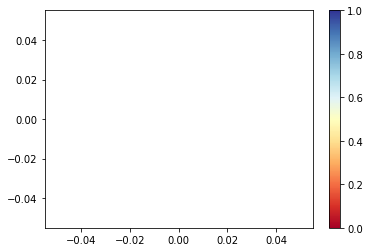

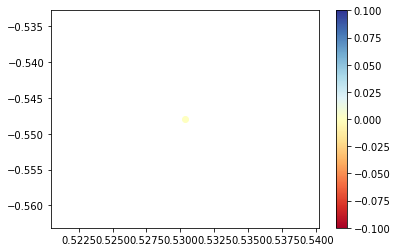

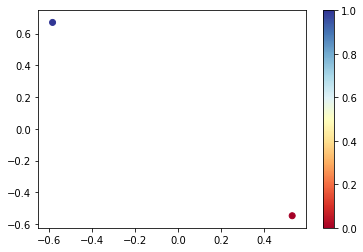

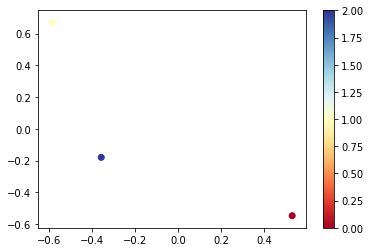

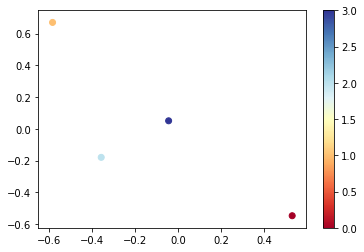

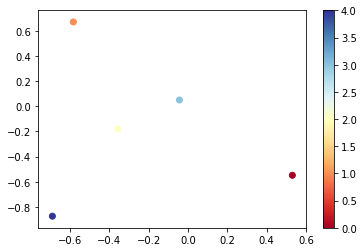

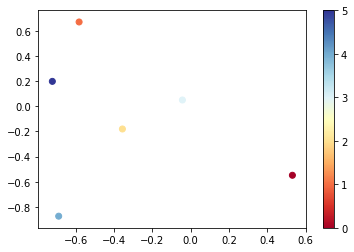

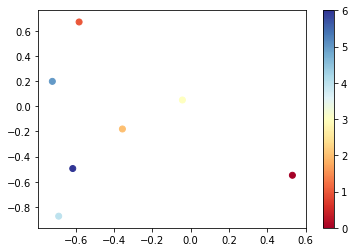

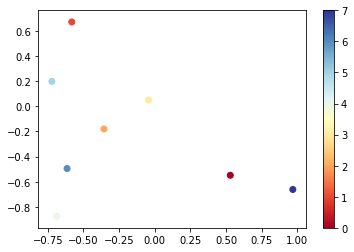

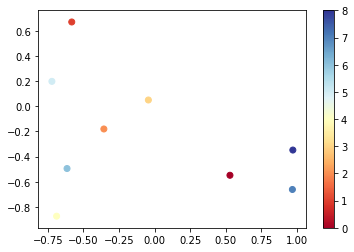

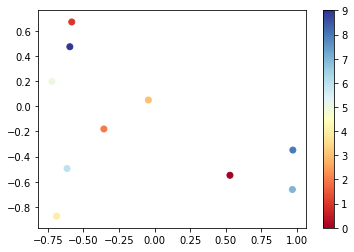

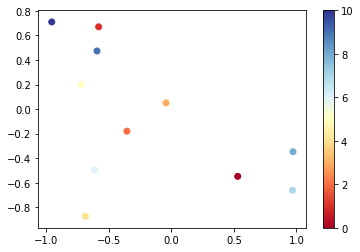

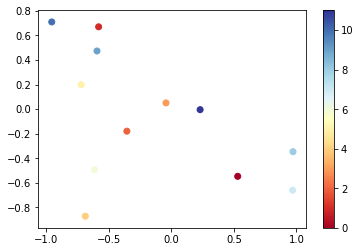

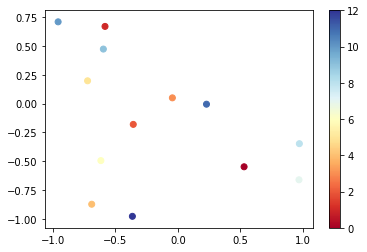

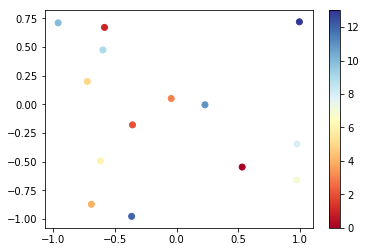

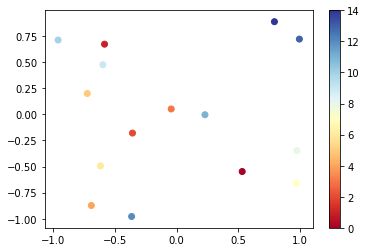

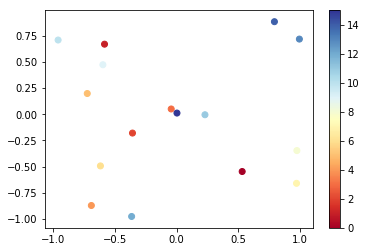

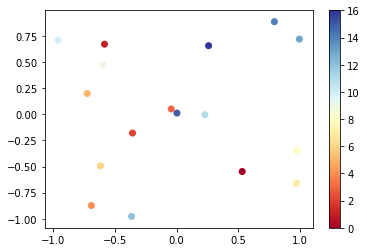

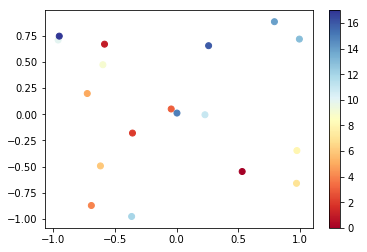

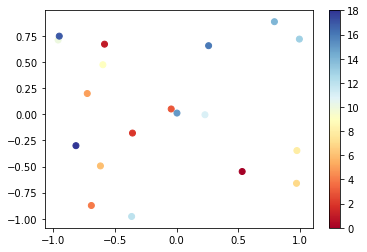

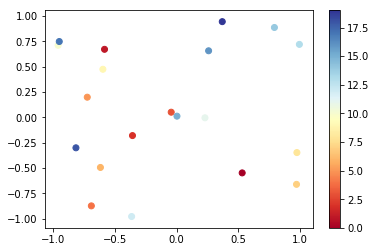

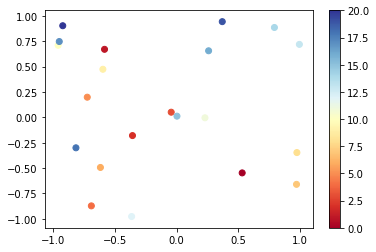

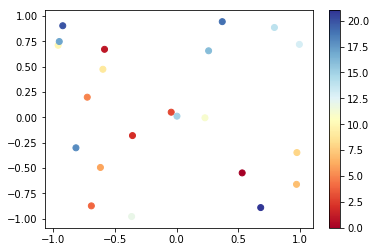

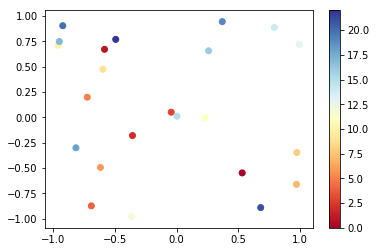

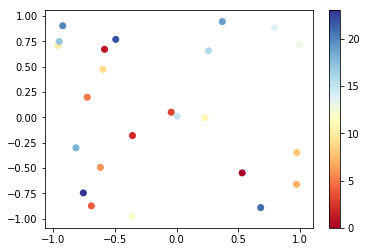

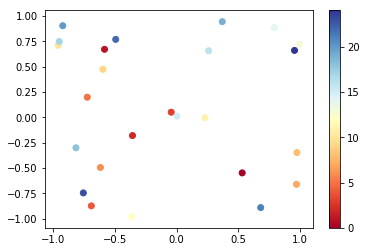

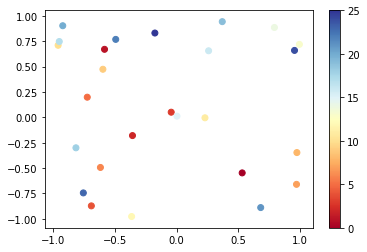

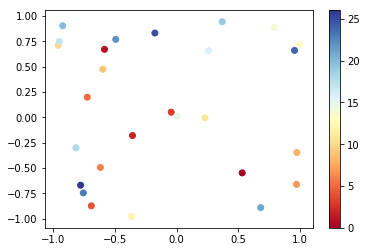

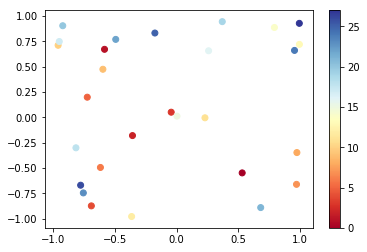

In [23]:
import os
import numpy as np
import matplotlib.pyplot as plt

for n in xrange(29):
    x = range(len(R.data['X'][:n, 0]))
    cm = plt.cm.get_cmap('RdYlBu')
    sc = plt.scatter(R.data['X'][:n, 0], R.data['X'][:n, 1], c = x, cmap = cm)
    plt.colorbar(sc)
    plt.show()

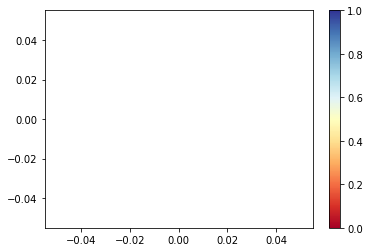

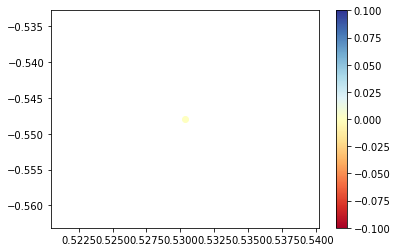

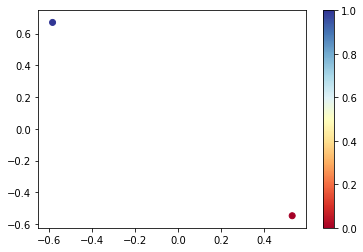

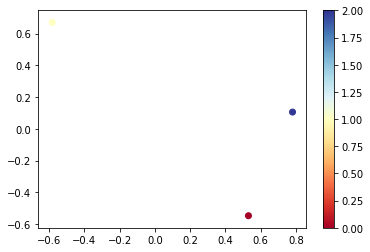

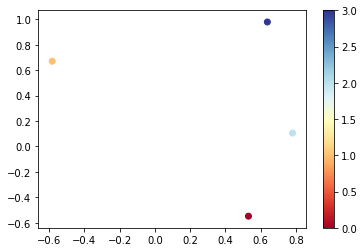

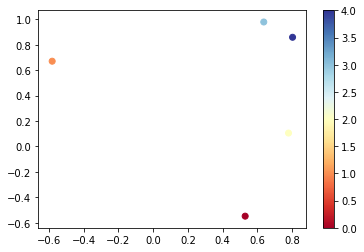

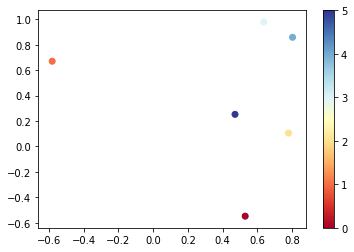

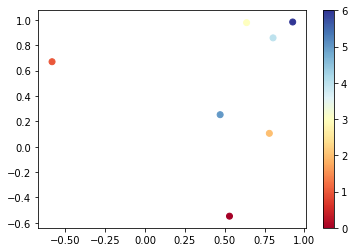

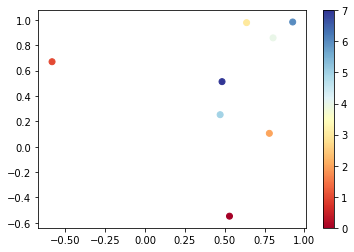

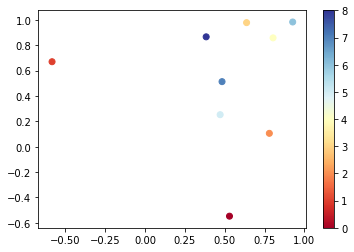

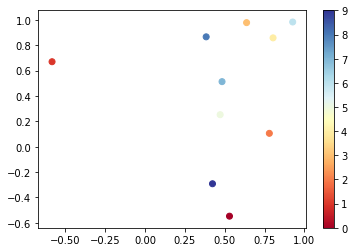

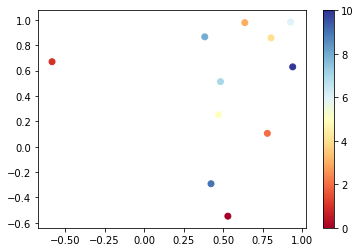

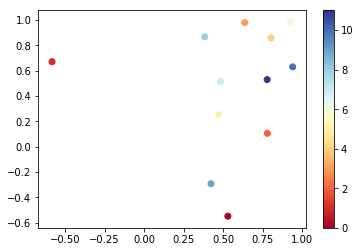

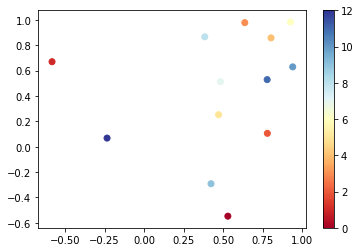

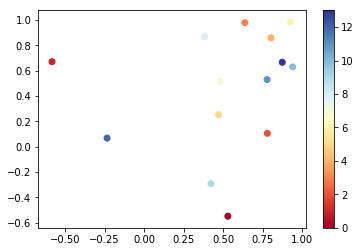

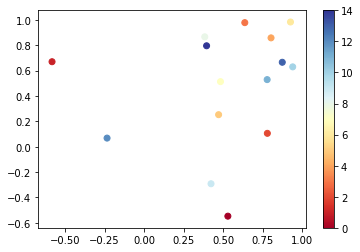

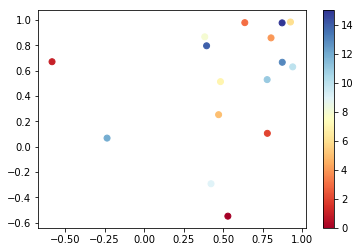

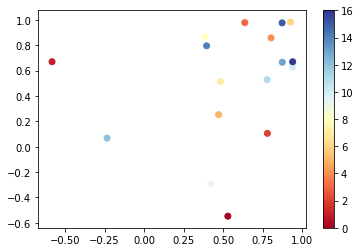

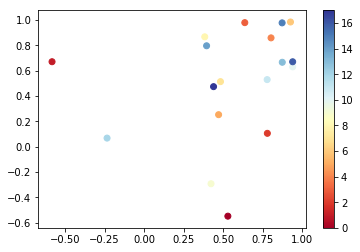

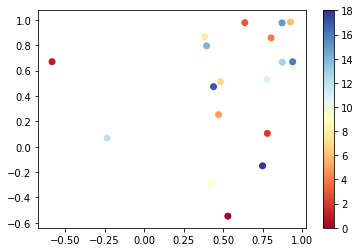

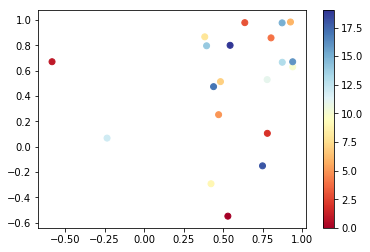

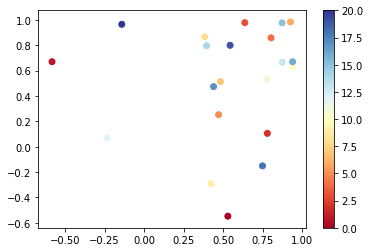

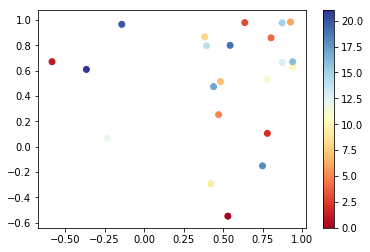

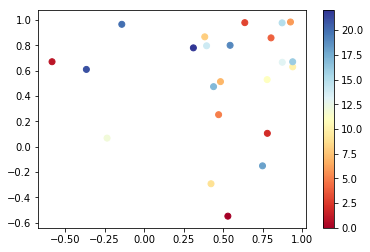

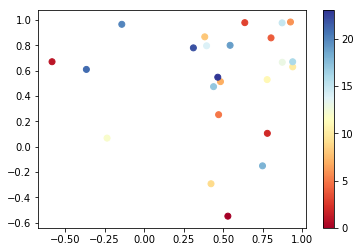

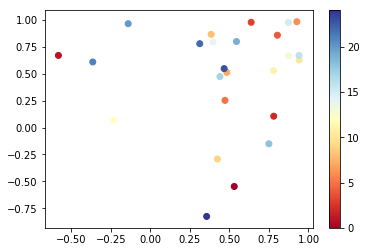

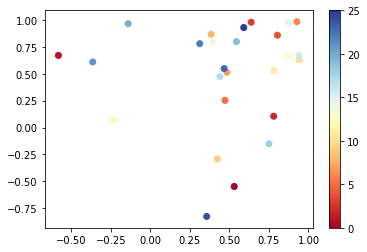

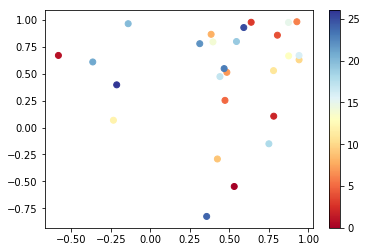

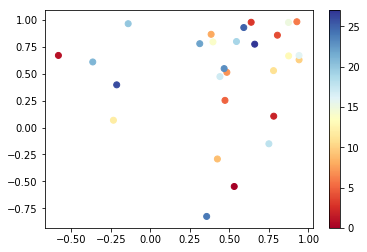

In [24]:
for n in xrange(29):
    x = range(len(R_random.data['X'][:n, 0]))
    cm = plt.cm.get_cmap('RdYlBu')
    sc = plt.scatter(R_random.data['X'][:n, 0], R_random.data['X'][:n, 1], c = x, cmap = cm)
    plt.colorbar(sc)
    plt.show()

In [30]:
plt.scatter(np.matmul(R.data['X'], R.fun.W), R.data['y'])
plt.show()

AttributeError: brainin instance has no attribute 'W'

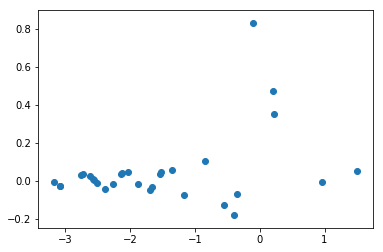

In [26]:
plt.scatter(np.matmul(R_random.data['X'], R_random.fun.W), R_random.data['y'])
plt.show()

In [10]:
import functions
import numpy as np
from SIBO import SIBO
D = 25

res = []

for n in xrange(40):
    fun = functions.brainin(D)
    R = SIBO(fun, 2, 4, 25, 0.1, 1, 100)

    vtrue = np.zeros([2, D])

    for n in xrange(2):
        vtrue[n, fun.eff_indices[n]] = 1.

    res.append(cos_mat(vtrue, R.W.T))
    

0.408838391128


In [66]:
import functions
import numpy as np
from SIBO import SIBO

res = []
for n in xrange(40):
    fun = functions.sinc_simple10()
    R = SIBO(fun, 1, 4, 25, 0.1, 1, 100)

    vtrue = fun.W
    res.append(cos_vec(vtrue, R.W.T))
    

In [58]:
np.save('sinc10D_SIBO_100', np.array(res))

In [88]:
print np.average(res), np.sqrt(np.var(res))

0.528292358423 0.0929095559612


In [90]:
D = 25

res_ = []

for i in xrange(1, 20):
    fun = functions.brainin(D)
    res = []
    for n in xrange(40):
        R = SIBO(fun, 2, 5, i, 0.01, 1, 100)

        vtrue = np.zeros([2, D])

        for n in xrange(2):
            vtrue[n, fun.eff_indices[n]] = 1.

        res.append(cos_mat(vtrue, R.W.T))
    
    res_.append(res)

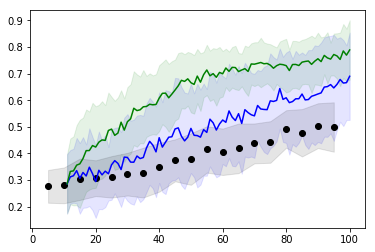

In [107]:
import os
import numpy as np
import matplotlib.pyplot as plt

path = './result_PESSL'
res = []

for f in os.listdir(path):
    filepath = os.path.join(path, f)
    
    if os.path.isfile(filepath) and 'brainin' in filepath:
        temp = np.load(filepath)
        res.append(temp[()]['S'])

mean = np.average(res, axis = 0)
var = np.var(res, axis = 0)

x = range(11, 11+len(mean))

plt.plot(x, mean[:, 0], 'b')
plt.plot(x, mean[:, 1], 'g')
plt.fill_between(x, mean[:, 0] - np.sqrt(var[:, 0]), mean[:, 0] + np.sqrt(var[:, 0]), color = 'b', alpha = 0.1)
plt.fill_between(x, mean[:, 1] - np.sqrt(var[:, 1]), mean[:, 1] + np.sqrt(var[:, 1]), color = 'g', alpha = 0.1)
plt.scatter(range(5, 100, 5), mean_, color = 'k')
plt.fill_between(range(5, 100, 5), mean_ - std_, mean_ + std_, color = 'k', alpha = 0.1)
plt.show()

In [95]:
mean_ = np.average(res_, axis = 1)
std_ = np.sqrt(np.var(res_, axis = 1))

In [101]:
print range(5, 100, 5)
print mean_, std_

20
[ 0.27596233  0.27958358  0.30259338  0.30655503  0.31164808  0.32171268
  0.32772132  0.34753091  0.37383826  0.37853184  0.41478681  0.40589838
  0.41884647  0.43744691  0.44273733  0.49179134  0.47740296  0.5041034
  0.49912277] [ 0.06163637  0.06729413  0.07773271  0.06727029  0.0779515   0.08024546
  0.09361285  0.09151889  0.07898009  0.09681176  0.08715135  0.08723132
  0.09327371  0.07489133  0.07815766  0.07052735  0.08912435  0.08427165
  0.09287556]
